In [1]:
print "ready"

ready


In [2]:
#!pip install nltk

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pprint
import os
import re
import csv
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import tfidf
from nltk.tokenize import word_tokenize
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn import cross_validation
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score

C:\Users\mom1\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
path='C:/Users/mom1/Desktop/571/'

In [ ]:
names=["ID","title","IMDB URL","genre","director","cast","IMDB rating","mpaa","writer",
    "certificates","runtimes","year","plot summary","plot keywords","type",
    "full screen image URL"]
mov=pd.read_table('C:/Users/mom1/Desktop/571/all.16.data',sep='|',header= None,names=names)

In [ ]:
import fileinput
splitLen = 50000         # 20 lines per file
outputBase = 'output' # output.1.txt, output.2.txt, etc.

# This is shorthand and not friendly with memory
# on very large files (Sean Cavanagh), but it works.
input = open('C:/Users/mom1/Desktop/571/all.16.data', 'r').read().split('\n')

at = 1
for lines in range(0, len(input), splitLen):
    # First, get the list slice
    outputData = input[lines:lines+splitLen]

    # Now open the output file, join the new slice with newlines
    # and write it out. Then close the file.
    output = open(outputBase + str(at) + '.data', 'w')
    output.write('\n'.join(outputData))
    output.close()

    # Increment the counter
    at += 1

In [7]:
print mov.shape
mov.info()

NameError: name 'mov' is not defined

In [6]:
mov.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL
0,NaN,NaN,http://akas.imdb.com/title/tt0361497/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...
4,NaN,NaN,http://akas.imdb.com/title/tt0361501/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[u'title-directed-by-female', u'based-on-novel']",NaN,NaN


In [7]:
mov.to_csv('mov.csv')

In [10]:
print mov.ID.isnull().value_counts()
print mov.genre.isnull().value_counts()

False    1832055
True       55111
Name: ID, dtype: int64
False    1656441
True      230725
Name: genre, dtype: int64


In [15]:
mov1=mov.dropna(subset=["ID"])

In [16]:
print mov1.ID.isnull().value_counts()
print mov1.genre.isnull().value_counts()

False    1832055
Name: ID, dtype: int64
False    1656440
True      175615
Name: genre, dtype: int64


In [17]:
mov1=mov1.dropna(subset=["genre"])

In [18]:
print mov1.genre.isnull().value_counts()

False    1656440
Name: genre, dtype: int64


In [19]:
mov1=mov1.drop_duplicates("ID")

In [20]:
mov1.shape

(1002801, 16)

In [22]:
mov1.to_csv("mov1.csv")

In [34]:
mov1.columns

Index([u'ID', u'title', u'IMDB URL', u'genre', u'director', u'cast',
       u'IMDB rating ', u' mpaa ', u' writer ', u' certificates ',
       u' runtimes ', u' year ', u' plot summary ', u' plot keywords ',
       u' type ', u' full screen image URL'],
      dtype='object')

In [57]:
pattern = re.compile("(?P<URL_ID>\d+)")

In [158]:
pattern = re.compile("(?P<IMDB_URL>|+)")
mov1.loc[515924,"title"]str.extract(pattern, expand=True)

SyntaxError: invalid syntax (<ipython-input-158-a7670556da82>, line 2)

In [160]:
mov1.loc[515924,"title"]

'I Hunted: Part 2|http://akas.imdb.com/title/tt1605261/|Comedy,Drama,Fantasy,Horror,Romance||,(Adam Chambers)-(Wyatt),(Josh Nuncio)-(Nick),(Erin Way)-(Lucy),(Cherilyn Wilson)-(Corbin)||||||2009||||\n1605262|I Hunted: Part 3'

In [49]:
mov1["IMDB URL"][1]

'http://akas.imdb.com/title/tt0361498/'

In [70]:
mov2 = pd.merge(mov1, mov1["IMDB URL"].str.extract(pattern, expand=True),
                         left_index=True, right_index=True)

In [28]:
# %load tfidf.py
#!/usr/bin/env python

"""
The simplest TF-IDF library imaginable.

Add your documents as two-element lists `[docname, [list_of_words_in_the_document]]` with `addDocument(docname, list_of_words)`. Get a list of all the `[docname, similarity_score]` pairs relative to a document by calling `similarities([list_of_words])`.

See the README for a usage example.
"""

import sys
import os

class tfidf:
  def __init__(self):
    self.weighted = False
    self.documents = []
    self.corpus_dict = {}

  def addDocument(self, doc_name, list_of_words):
    # building a dictionary
    doc_dict = {}
    for w in list_of_words:
      doc_dict[w] = doc_dict.get(w, 0.) + 1.0
      self.corpus_dict[w] = self.corpus_dict.get(w, 0.0) + 1.0

    # normalizing the dictionary
    length = float(len(list_of_words))
    for k in doc_dict:
      doc_dict[k] = doc_dict[k] / length

    # add the normalized document to the corpus
    self.documents.append([doc_name, doc_dict])

  def similarities(self, list_of_words):
    """Returns a list of all the [docname, similarity_score] pairs relative to a list of words."""

    # building the query dictionary
    query_dict = {}
    for w in list_of_words:
      query_dict[w] = query_dict.get(w, 0.0) + 1.0

    # normalizing the query
    length = float(len(list_of_words))
    for k in query_dict:
      query_dict[k] = query_dict[k] / length

    # computing the list of similarities
    sims = []
    for doc in self.documents:
      score = 0.0
      doc_dict = doc[1]
      for k in query_dict:
        if k in doc_dict:
          score += (query_dict[k] / self.corpus_dict[k]) + (doc_dict[k] / self.corpus_dict[k])
      sims.append([doc[0], score])

    return sims

In [65]:
mov2.columns

Index([u'ID', u'title', u'IMDB URL', u'genre', u'director', u'cast',
       u'IMDB rating ', u' mpaa ', u' writer ', u' certificates ',
       u' runtimes ', u' year ', u' plot summary ', u' plot keywords ',
       u' type ', u' full screen image URL', u'URL_ID'],
      dtype='object')

In [71]:
cols =[" full screen image URL","IMDB rating "]
mov2=mov2.drop(cols,axis=1)
mov2.head()

,ID,title,IMDB URL,genre,director,cast,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,URL_ID
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...","Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,0361498
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,0361499
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,0361500
6,361503.0,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,0361503
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,0361505


In [72]:
print mov2.shape
mov2.info()

(1002801, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002801 entries, 1 to 1887165
Data columns (total 15 columns):
ID                 1002801 non-null float64
title              1002801 non-null object
IMDB URL           1002801 non-null object
genre              1002801 non-null object
director           713777 non-null object
cast               898899 non-null object
 mpaa              11653 non-null object
 writer            553456 non-null object
 certificates      165981 non-null object
 runtimes          453692 non-null object
 year              987963 non-null float64
 plot summary      354677 non-null object
 plot keywords     328730 non-null object
 type              2 non-null object
URL_ID             1002800 non-null object
dtypes: float64(2), object(13)
memory usage: 122.4+ MB


In [81]:
pat=re.compile('(^0)')

In [83]:
mov2.URL_ID.replace(to_replace=pat,value='',inplace=True)

In [92]:
#mov2.ID=mov2.ID.astype(int)

In [101]:
mov2.URL_ID=mov2.URL_ID.convert_objects(convert_numeric=True)

C:\Users\mom1\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [129]:
print mov2.ID[1]
print mov2.URL_ID[1]
'True' if mov2.ID[1]==mov2.URL_ID[1] else'False'

361498
361498.0


'True'

In [136]:
for index,row in mov2.iterrows():
    if row.ID==row.URL_ID:
        mov2["Same ID"]=True
    else:
        mov2["Same ID"]=False

KeyboardInterrupt: 

In [ ]:
mov2.to_csv("mov2.csv")

In [138]:
mov2.shape

(1002801, 17)

In [139]:
mov3=mov2[mov2["ID"]==mov2["URL_ID"]]

In [140]:
print mov3.shape

(1002784, 17)


In [145]:
print mov2.shape[0]
print mov3.shape[0]
(mov2.shape[0] - mov3.shape[0])

1002801
1002784


17

In [130]:
mov2.title.isnull().value_counts()

False    1002801
Name: title, dtype: int64

In [134]:
print min(mov2[" year "])
print max(mov2[" year "])

1888.0
2020.0


In [135]:
mov2["Year_inrange"]=mov2[" year "].between(1874, 2117)

In [172]:
mov2.head()

,ID,title,IMDB URL,genre,director,cast,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,URL_ID,Same ID,Year_inrange
1,361498,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...","Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,361498.0,True,True
2,361499,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,361499.0,True,True
3,361500,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,361500.0,True,True
6,361503,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,361503.0,True,True
8,361505,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,361505.0,True,True


In [184]:
mov2.columns

Index([u'ID', u'title', u'IMDB URL', u'genre', u'director', u'cast', u' mpaa ',
       u' writer ', u' certificates ', u' runtimes ', u' year ',
       u' plot summary ', u' plot keywords ', u' type ', u'URL_ID', u'Same ID',
       u'Year_inrange'],
      dtype='object')

In [279]:
mov3=mov2[(mov2 != 0).all(1)]
mov3.shape

(987963, 17)

In [284]:
mov3.to_csv("mov3.csv")

In [237]:
fulllist=[]
mov2.title.apply(lambda x:fulllist.append(x))

1          None
2          None
3          None
6          None
8          None
9          None
10         None
11         None
12         None
13         None
14         None
16         None
18         None
19         None
24         None
28         None
29         None
32         None
33         None
35         None
38         None
41         None
42         None
43         None
45         None
47         None
48         None
50         None
52         None
53         None
           ... 
1887136    None
1887137    None
1887138    None
1887139    None
1887140    None
1887141    None
1887142    None
1887143    None
1887144    None
1887145    None
1887146    None
1887147    None
1887148    None
1887149    None
1887150    None
1887151    None
1887152    None
1887153    None
1887154    None
1887155    None
1887156    None
1887157    None
1887158    None
1887159    None
1887160    None
1887161    None
1887162    None
1887163    None
1887164    None
1887165    None
Name: title, dtype: obje

In [197]:
titlelist

['Death of a Dynasty',
 'The Secret Life of Racquel Darrian',
 'Delgo',
 'Devdas',
 'Dharmatma',
 'Dhruvanakshatram',
 'Sanitarium',
 'Dial 100',
 'A Diamond in the Rough',
 'Diana Ross: Red Hot Rhythm and Blues',
 'Dim Sum (A Little Bit of Heart)',
 'A Discontented Woman',
 'Do Jasoos',
 'Dodgeball',
 'Dodger DVD 7',
 'Dodger DVD 9',
 'Dog Brain',
 "Don't Play Play",
 'The Steve-O Video: Vol. II - The Tour Video',
 'Doosri Dulhan',
 'Dracula Unearthed',
 'A Dream of Egypt',
 'A Dreamland Tragedy',
 'Dreams',
 'The Drug Traffic',
 'A Dry Town',
 'Dr?les de jeux',
 'The Dude Raffles',
 'The Duke and the Actor',
 'The Dummy Director',
 'Early in the Morning',
 "Early's Awakening",
 'Eat and Grow Hungry',
 'Eccentric Comiques',
 'Edo iroha matsuri',
 'The Eel',
 'Ekstase - Der Proze? gegen die Satansm?dchen',
 'El matador',
 'The Election Bet',
 'Elektroprivreda Jugoslavije',
 'The Elixir of Life',
 'The Elixir of Love',
 'The Elixir of Youth',
 'The Elopement',
 "Elsie's Aunt",
 "Elsie's

In [227]:
summlist=[]
summ=mov2.dropna(subset=[" plot summary "])
summ[" plot summary "].apply(lambda x:summlist.append(x))

1          None
2          None
3          None
8          None
10         None
12         None
14         None
18         None
19         None
32         None
33         None
38         None
42         None
47         None
53         None
56         None
65         None
70         None
77         None
81         None
87         None
90         None
152        None
171        None
172        None
177        None
183        None
187        None
190        None
194        None
           ... 
1887124    None
1887125    None
1887126    None
1887127    None
1887129    None
1887131    None
1887132    None
1887133    None
1887134    None
1887135    None
1887141    None
1887144    None
1887146    None
1887147    None
1887149    None
1887150    None
1887151    None
1887152    None
1887154    None
1887155    None
1887156    None
1887157    None
1887158    None
1887159    None
1887160    None
1887161    None
1887162    None
1887163    None
1887164    None
1887165    None
Name:  plot summary , dt

In [238]:
summ[" plot summary "].apply(lambda x:fulllist.append(x))

1          None
2          None
3          None
8          None
10         None
12         None
14         None
18         None
19         None
32         None
33         None
38         None
42         None
47         None
53         None
56         None
65         None
70         None
77         None
81         None
87         None
90         None
152        None
171        None
172        None
177        None
183        None
187        None
190        None
194        None
           ... 
1887124    None
1887125    None
1887126    None
1887127    None
1887129    None
1887131    None
1887132    None
1887133    None
1887134    None
1887135    None
1887141    None
1887144    None
1887146    None
1887147    None
1887149    None
1887150    None
1887151    None
1887152    None
1887154    None
1887155    None
1887156    None
1887157    None
1887158    None
1887159    None
1887160    None
1887161    None
1887162    None
1887163    None
1887164    None
1887165    None
Name:  plot summary , dt

In [229]:
len(summlist)

354677

In [230]:
mov2[' plot keywords '].apply(lambda x:titlelist.append(x))
keylist=[]
keys=mov2.dropna(subset=[" plot keywords "])
keys[" plot keywords "].apply(lambda x:keylist.append(x))

1          None
2          None
3          None
6          None
8          None
10         None
11         None
13         None
19         None
24         None
28         None
35         None
38         None
48         None
63         None
80         None
87         None
89         None
95         None
170        None
175        None
176        None
177        None
182        None
188        None
192        None
193        None
194        None
196        None
197        None
           ... 
1887105    None
1887107    None
1887109    None
1887110    None
1887111    None
1887115    None
1887116    None
1887117    None
1887118    None
1887119    None
1887120    None
1887122    None
1887125    None
1887126    None
1887127    None
1887128    None
1887129    None
1887132    None
1887133    None
1887141    None
1887147    None
1887149    None
1887151    None
1887154    None
1887157    None
1887158    None
1887159    None
1887160    None
1887161    None
1887164    None
Name:  plot keywords , d

In [239]:
keys[" plot keywords "].apply(lambda x:fulllist.append(x))

1          None
2          None
3          None
6          None
8          None
10         None
11         None
13         None
19         None
24         None
28         None
35         None
38         None
48         None
63         None
80         None
87         None
89         None
95         None
170        None
175        None
176        None
177        None
182        None
188        None
192        None
193        None
194        None
196        None
197        None
           ... 
1887105    None
1887107    None
1887109    None
1887110    None
1887111    None
1887115    None
1887116    None
1887117    None
1887118    None
1887119    None
1887120    None
1887122    None
1887125    None
1887126    None
1887127    None
1887128    None
1887129    None
1887132    None
1887133    None
1887141    None
1887147    None
1887149    None
1887151    None
1887154    None
1887157    None
1887158    None
1887159    None
1887160    None
1887161    None
1887164    None
Name:  plot keywords , d

In [231]:
len(keylist)

328730

In [240]:
len(fulllist)

1686208

In [241]:
count_vectorizer = CountVectorizer(binary='true')
data = count_vectorizer.fit_transform(fulllist)

In [244]:
data.shape

(1686208, 399721)

In [262]:
data

<1686208x399721 sparse matrix of type '<type 'numpy.int64'>'
	with 27554885 stored elements in Compressed Sparse Row format>

In [258]:
tfidf_data = TfidfTransformer(use_idf=False).fit_transform(data)

In [261]:
tfidf_data.get_shape()

(1686208, 399721)

In [263]:
tfidf_data

<1686208x399721 sparse matrix of type '<type 'numpy.float64'>'
	with 27554885 stored elements in Compressed Sparse Row format>

In [275]:
data.data[2:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [282]:
import tfidf

In [283]:
table = tfidf.tfidf()
table.addDocument("foo", ["alpha", "bravo", "charlie", "delta", "echo", "foxtrot", "golf", "hotel"])
table.addDocument("bar", ["alpha", "bravo", "charlie", "india", "juliet", "kilo"])
table.addDocument("baz", ["kilo", "lima", "mike", "november"])

print table.similarities (["alpha", "bravo", "charlie"]) # => [['foo', 0.6875], ['bar', 0.75], ['baz', 0.0]]

[['foo', 0.6875], ['bar', 0.75], ['baz', 0.0]]


In [285]:
mov3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987963 entries, 1 to 1887165
Data columns (total 17 columns):
ID                 987963 non-null int32
title              987963 non-null object
IMDB URL           987963 non-null object
genre              987963 non-null object
director           709518 non-null object
cast               887134 non-null object
 mpaa              11653 non-null object
 writer            548643 non-null object
 certificates      165294 non-null object
 runtimes          452411 non-null object
 year              987963 non-null float64
 plot summary      352455 non-null object
 plot keywords     327022 non-null object
 type              0 non-null object
URL_ID             987962 non-null float64
Same ID            987963 non-null bool
Year_inrange       987963 non-null bool
dtypes: bool(2), float64(2), int32(1), object(12)
memory usage: 118.7+ MB


In [5]:
mov3=pd.read_csv(path+"mov3.csv")
print mov3.shape
mov3.head()

C:\Users\mom1\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1002784, 18)


,Unnamed: 0,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID
0,1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498.0
1,2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499.0
2,3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500.0
3,6,361503.0,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",6.9,NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,https://images-na.ssl-images-amazon.com/images...,361503.0
4,8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505.0


In [5]:
del mov3["Unnamed: 0"]

In [18]:
!pip install nltk

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [10]:
from nltk.tokenize import word_tokenize
example = ['Mary had a little lamb' , 
            'Jack went up the hill' , 
            'Jill followed suit' ,    
            'i woke up suddenly' ,
            'it was a really bad dream...']
tokenized_sents = [word_tokenize(i) for i in example]
for i in tokenized_sents:
     print i

['Mary', 'had', 'a', 'little', 'lamb']
['Jack', 'went', 'up', 'the', 'hill']
['Jill', 'followed', 'suit']
['i', 'woke', 'up', 'suddenly']
['it', 'was', 'a', 'really', 'bad', 'dream', '...']


In [12]:
example=mov3["title"][0:5]
tokenized_sents = [word_tokenize(i) for i in example]
for i in tokenized_sents:
     print i

['Death', 'of', 'a', 'Dynasty']
['The', 'Secret', 'Life', 'of', 'Racquel', 'Darrian']
['Delgo']
['Devdas']
['Dharmatma']


In [13]:
mov3["title"][0:5]

0                    Death of a Dynasty
1    The Secret Life of Racquel Darrian
2                                 Delgo
3                                Devdas
4                             Dharmatma
Name: title, dtype: object

In [6]:
example=mov3["title"]
mov3["title_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,URL_ID,Same ID,Year_inrange,title_tok
0,361498,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...","Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,361498.0,True,True,"[Death, of, a, Dynasty]"
1,361499,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,361499.0,True,True,"[The, Secret, Life, of, Racquel, Darrian]"
2,361500,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,361500.0,True,True,[Delgo]
3,361503,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,361503.0,True,True,[Devdas]
4,361505,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,361505.0,True,True,[Dharmatma]


In [38]:
import tfidf
table = tfidf.tfidf()

In [33]:
table.addDocument("doo", ["alpha", "bravo", "charlie", "delta", "echo", "foxtrot", "golf", "hotel"])
"""""for i in mov3.title_tok.item
table.addDocument()"""""
table.documents

[['foo',
  {'alpha': 0.125,
   'bravo': 0.125,
   'charlie': 0.125,
   'delta': 0.125,
   'echo': 0.125,
   'foxtrot': 0.125,
   'golf': 0.125,
   'hotel': 0.125}],
 ['foo',
  {'alpha': 0.125,
   'bravo': 0.125,
   'charlie': 0.125,
   'delta': 0.125,
   'echo': 0.125,
   'foxtrot': 0.125,
   'golf': 0.125,
   'hotel': 0.125}],
 ['foo',
  {'alpha': 0.125,
   'bravo': 0.125,
   'charlie': 0.125,
   'delta': 0.125,
   'echo': 0.125,
   'foxtrot': 0.125,
   'golf': 0.125,
   'hotel': 0.125}],
 ['foo',
  {'alpha': 0.125,
   'bravo': 0.125,
   'charlie': 0.125,
   'delta': 0.125,
   'echo': 0.125,
   'foxtrot': 0.125,
   'golf': 0.125,
   'hotel': 0.125}],
 ['doo',
  {'alpha': 0.125,
   'bravo': 0.125,
   'charlie': 0.125,
   'delta': 0.125,
   'echo': 0.125,
   'foxtrot': 0.125,
   'golf': 0.125,
   'hotel': 0.125}],
 ['doo',
  {'alpha': 0.125,
   'bravo': 0.125,
   'charlie': 0.125,
   'delta': 0.125,
   'echo': 0.125,
   'foxtrot': 0.125,
   'golf': 0.125,
   'hotel': 0.125}]]

In [39]:
table.corpus_dict

{}

In [7]:
example=mov3["genre"]
mov3["genre_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,URL_ID,Same ID,Year_inrange,title_tok,genre_tok
0,361498,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...","Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,361498.0,True,True,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]"
1,361499,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,361499.0,True,True,"[The, Secret, Life, of, Racquel, Darrian]",[Adult]
2,361500,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,361500.0,True,True,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas..."
3,361503,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,361503.0,True,True,[Devdas],[Drama]
4,361505,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,361505.0,True,True,[Dharmatma],"[Action, ,, Romance, ,, Thriller]"


In [45]:
example=mov3["director"]
mov3["director_tok"] = [word_tokenize(i) for i in example]
mov3.head()

TypeError: expected string or buffer

In [83]:
mov4['director_tok'] = np.empty((len(mov4), 0)).tolist()

In [35]:
mov3.head()

,ID,title,IMDB URL,genre,director,cast,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,URL_ID,Same ID,Year_inrange,title_tok,genre_tok,director_tok
0,361498,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...","Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,361498.0,True,True,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]",[]
1,361499,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,361499.0,True,True,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],[]
2,361500,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,361500.0,True,True,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...",[]
3,361503,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,361503.0,True,True,[Devdas],[Drama],[]
4,361505,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,361505.0,True,True,[Dharmatma],"[Action, ,, Romance, ,, Thriller]",[]


In [82]:
del mov4["director_tok"]

In [55]:
mov3.loc[15,"director"]

nan

In [58]:
print mov3.shape
mov4=mov3.dropna(subset=["director"])
mov4.shape

(987963, 20)


(709518, 20)

In [54]:
example=mov3["director"]
count=0
index=0
for i in example:
    alll=word_tokenize(i)
    mov3.set_value(index,"director_tok", alll)
    index+=1
    print index
    #count+=1
    #if count==3:
        #break
#mov3["director_tok"] = [word_tokenize(i) for i in example]
mov3.head()

1
2
3
4
5
6
7
8
9
10
11
12
13
14


TypeError: expected string or buffer

In [ ]:
example=mov3[" writer "]
index=0
for i in example:
    mov3.loc[index,"director_tok"]=word_tokenize(i)
    index+=1
#mov3["director_tok"] = [word_tokenize(i) for i in example]
mov3.head()

In [18]:
count=0
for index,row in mov3.iterrows():
    for i in row["title_tok"]:
        print i
    count+=1
    if count==5:
        break

Death
of
a
Dynasty
The
Secret
Life
of
Racquel
Darrian
Delgo
Devdas
Dharmatma


In [44]:
allis=mov3["title_tok"][1]+mov3["title_tok"][2]
allis

['The', 'Secret', 'Life', 'of', 'Racquel', 'Darrian', 'Delgo']

In [49]:
count=0
#allis=[]
for index,row in mov3.iterrows():
    #allis=[row["title_tok"]+row["title_tok"]]
    for i in row["genre_tok"]:
        table.addDocument(i,row["title_tok"]+row["title_tok"])
    count+=1
    if count==3:
        break

In [50]:
table.documents

[['Musical', {'Death': 0.25, 'Dynasty': 0.25, 'a': 0.25, 'of': 0.25}],
 [',', {'Death': 0.25, 'Dynasty': 0.25, 'a': 0.25, 'of': 0.25}],
 ['Comedy', {'Death': 0.25, 'Dynasty': 0.25, 'a': 0.25, 'of': 0.25}],
 ['Adult',
  {'Darrian': 0.16666666666666666,
   'Life': 0.16666666666666666,
   'Racquel': 0.16666666666666666,
   'Secret': 0.16666666666666666,
   'The': 0.16666666666666666,
   'of': 0.16666666666666666}],
 ['Animation', {'Delgo': 1.0}],
 [',', {'Delgo': 1.0}],
 ['Adventure', {'Delgo': 1.0}],
 [',', {'Delgo': 1.0}],
 ['Comedy', {'Delgo': 1.0}],
 [',', {'Delgo': 1.0}],
 ['Fantasy', {'Delgo': 1.0}],
 [',', {'Delgo': 1.0}],
 ['Romance', {'Delgo': 1.0}],
 ['Drama', {'Devdas': 1.0}],
 ['Action', {'Dharmatma': 1.0}],
 [',', {'Dharmatma': 1.0}],
 ['Romance', {'Dharmatma': 1.0}],
 [',', {'Dharmatma': 1.0}],
 ['Thriller', {'Dharmatma': 1.0}],
 ['Musical', {'Death': 0.25, 'Dynasty': 0.25, 'a': 0.25, 'of': 0.25}],
 [',', {'Death': 0.25, 'Dynasty': 0.25, 'a': 0.25, 'of': 0.25}],
 ['Comedy', 

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
movt=pd.DataFrame(columns=['ID', 'title_nsw'])
for index,row in mov3.iterrows():
    movt.loc[index,"ID"]=row["ID"]
    movt.loc[index,"title_nsw"] = [w for w in row["title_tok"] if not w in stop_words]

In [ ]:
print "done"

In [ ]:
movt.head()

In [95]:
mov3.head()

,ID,title,IMDB URL,genre,director,cast,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,URL_ID,Same ID,Year_inrange,title_tok,genre_tok
0,361498,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...","Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,361498.0,True,True,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]"
1,361499,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,361499.0,True,True,"[The, Secret, Life, of, Racquel, Darrian]",[Adult]
2,361500,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,361500.0,True,True,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas..."
3,361503,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,361503.0,True,True,[Devdas],[Drama]
4,361505,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,361505.0,True,True,[Dharmatma],"[Action, ,, Romance, ,, Thriller]"


In [ ]:
mov3.columns

In [110]:
del mov3['title_nsw']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for index,row in movt.iterrows():
    for w in row["title_nsw"]:
        movt.loc[index,"title_stem"]=movt.loc[index,"title_stem"]+ps.stem(w)
        print movt.loc[index,"title_stem"]
        break

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for index,row in movt.iterrows():
    for w in row["title_nsw"]:
        movt.loc[index,"title_stem"]=movt.loc[index,"title_stem"]+lemmatizer.lemmatize(w)
        print movt.loc[index,"title_stem"]
        break

In [61]:
mov4.columns

Index([u'ID', u'title', u'IMDB URL', u'genre', u'director', u'cast', u' mpaa ',
       u' writer ', u' certificates ', u' runtimes ', u' year ',
       u' plot summary ', u' plot keywords ', u' type ', u'URL_ID', u'Same ID',
       u'Year_inrange', u'title_tok', u'genre_tok', u'director_tok'],
      dtype='object')

In [60]:
print mov4.shape
mov4=mov4.dropna(subset=[" writer "])
mov4.shape

(709518, 20)


(486084, 20)

In [62]:
print mov4.shape
mov4=mov4.dropna(subset=["cast"])
mov4.shape

(486084, 20)


(458850, 20)

In [63]:
print mov4.shape
mov4=mov4.dropna(subset=[" plot summary "])
mov4.shape

(458850, 20)


(247102, 20)

In [64]:
print mov4.shape
mov4=mov4.dropna(subset=[" plot keywords "])
mov4.shape

(247102, 20)


(142796, 20)

In [5]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [102]:
mov4=mov4.reset_index()

In [103]:
example=mov4["director"]
mov4["director_tok"] = [word_tokenize(i) for i in example]
mov4.head()

TypeError: expected string or buffer

In [ ]:
count=0
for index,row in mov4.iterrows():
    example=row["director"]
    print example
    for i in example:
        print type(i)
        print i
        alll=word_tokenize(i)
        mov4.set_value(index,"director_tok", alll)
    #mov4.loc[index,"diretor_tok"]=alll
    #index+=1
    #count+=1
    #if count==3:
        #break
#mov3["director_tok"] = [word_tokenize(i) for i in example]
#print mov4.head()

In [ ]:
for index,row in mov4.iterrows():
    example=row[" writer "]
    for i in example:
        alll=word_tokenize(i)
        mov4.set_value(index,"writer_tok", alll)

In [ ]:
mov4.head()

In [8]:
names=["ID","title","IMDB URL","genre","director","cast","IMDB rating","mpaa","writer",
    "certificates","runtimes","year","plot summary","plot keywords","type",
    "full screen image URL"]
mov=pd.read_table('C:/Users/mom1/Desktop/571/output1.data',sep='|',header= None,names=names)

In [14]:
print mov.shape
mov.info()

(50000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
ID                       47361 non-null float64
title                    47361 non-null object
IMDB URL                 50000 non-null object
genre                    43801 non-null object
director                 41434 non-null object
cast                     30546 non-null object
IMDB rating              23477 non-null float64
mpaa                     424 non-null object
writer                   17264 non-null object
certificates             5351 non-null object
runtimes                 23364 non-null object
year                     46576 non-null float64
plot summary             24018 non-null object
plot keywords            25295 non-null object
type                     0 non-null float64
full screen image URL    16298 non-null object
dtypes: float64(4), object(12)
memory usage: 6.1+ MB


In [13]:
mov.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL
0,NaN,NaN,http://akas.imdb.com/title/tt0361497/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...
4,NaN,NaN,http://akas.imdb.com/title/tt0361501/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[u'title-directed-by-female', u'based-on-novel']",NaN,NaN


In [9]:
print mov.ID.isnull().value_counts()
mov.genre.isnull().value_counts()

False    47361
True      2639
Name: ID, dtype: int64


False    43801
True      6199
Name: genre, dtype: int64

In [9]:
mov1=mov.dropna(subset=["ID"])
mov1=mov1.dropna(subset=["genre"])
print mov1.ID.isnull().value_counts()
mov1.genre.isnull().value_counts()

False    43801
Name: ID, dtype: int64


False    43801
Name: genre, dtype: int64

In [10]:
print mov1.shape
mov1=mov1.drop_duplicates("ID")
mov1.shape

(43801, 16)


(19411, 16)

In [11]:
pattern = re.compile("(?P<URL_ID>\d+)")
mov2 = pd.merge(mov1, mov1["IMDB URL"].str.extract(pattern, expand=True),
                         left_index=True, right_index=True)

In [10]:
print mov2.shape
mov2.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,0361498
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,0361499
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,0361500
6,361503.0,Devdas,http://akas.imdb.com/title/tt0361503/,Drama,",P.C. Barua",",(Nirmal Bannerjee)-(),(P.C. Barua)-(Devdas),(...",6.9,NaN,",P.C. Barua,Saratchandra Chatterjee",NaN,[u'India:141'],1935.0,NaN,[u'based-on-novel'],NaN,https://images-na.ssl-images-amazon.com/images...,0361503
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,0361505


In [29]:
mov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19411 entries, 1 to 46676
Data columns (total 17 columns):
ID                       19411 non-null float64
title                    19411 non-null object
IMDB URL                 19411 non-null object
genre                    19411 non-null object
director                 16561 non-null object
cast                     16021 non-null object
IMDB rating              7560 non-null float64
mpaa                     358 non-null object
writer                   10073 non-null object
certificates             3011 non-null object
runtimes                 10649 non-null object
year                     19373 non-null float64
plot summary             8116 non-null object
plot keywords            8577 non-null object
type                     0 non-null float64
full screen image URL    4459 non-null object
URL_ID                   19411 non-null object
dtypes: float64(4), object(13)
memory usage: 2.7+ MB


In [13]:
mov2.URL_ID=mov2.URL_ID.convert_objects(convert_numeric=True)

C:\Users\mom1\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [14]:
mov3=mov2[mov2["ID"]==mov2["URL_ID"]]
mov3.shape

(19411, 17)

In [6]:
mov3=mov3.dropna(subset=["director"])
print mov3.shape
mov3=mov3.dropna(subset=["writer"])
print mov3.shape

(713766, 18)
(488758, 18)


In [7]:
mov3=mov3.dropna(subset=["plot summary"])
print mov3.shape
mov3=mov3.dropna(subset=["plot keywords"])
print mov3.shape

(255687, 18)
(147269, 18)


In [35]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [15]:
example=mov3["title"]
mov3["title_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID,title_tok
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]"
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]"
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo]
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma]
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']","[u'Germany:83', u'UK:86']",2001.0,"[u'A generation ago, Dr Max Warick was researc...","[u'hospital', u'medical', u'british', u'indepe...",NaN,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium]


In [16]:
example=mov3["genre"]
mov3["genre_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID,title_tok,genre_tok
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]"
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult]
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas..."
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]"
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']","[u'Germany:83', u'UK:86']",2001.0,"[u'A generation ago, Dr Max Warick was researc...","[u'hospital', u'medical', u'british', u'indepe...",NaN,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]"


In [18]:
example=mov3["director"]
mov3["director_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID,title_tok,genre_tok,director_tok
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]","[,, Damon, Dash]"
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],"[,, Toni, English, ,, Derrick, Lane, ,, Paul, ..."
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...","[,, Marc, F., Adler, ,, Jason, Maurer]"
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]","[,, Feroz, Khan]"
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']","[u'Germany:83', u'UK:86']",2001.0,"[u'A generation ago, Dr Max Warick was researc...","[u'hospital', u'medical', u'british', u'indepe...",NaN,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]","[,, James, Eaves, ,, Johannes, Roberts]"


In [19]:
example=mov3["writer"]
mov3["writer_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,...,year,plot summary,plot keywords,type,full screen image URL,URL_ID,title_tok,genre_tok,director_tok,writer_tok
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],...,2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]","[,, Damon, Dash]","[,, Adam, Moreno]"
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],...,2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],"[,, Toni, English, ,, Derrick, Lane, ,, Paul, ...","[,, Toni, English]"
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",...,2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...","[,, Marc, F., Adler, ,, Jason, Maurer]","[,, Patrick, J., Cowan, ,, Carl, Dream, ,, Jen..."
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],...,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]","[,, Feroz, Khan]","[,, Kaushal, Bharati, ,, Kaushal, Bharati, ,, ..."
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']",...,2001.0,"[u'A generation ago, Dr Max Warick was researc...","[u'hospital', u'medical', u'british', u'indepe...",NaN,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]","[,, James, Eaves, ,, Johannes, Roberts]","[,, James, Eaves, ,, Johannes, Roberts]"


In [20]:
example=mov3["plot summary"]
mov3["ps_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,...,plot summary,plot keywords,type,full screen image URL,URL_ID,title_tok,genre_tok,director_tok,writer_tok,ps_tok
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],...,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]","[,, Damon, Dash]","[,, Adam, Moreno]","[[, u'A, young, journalist, ,, David, Katz, ,,..."
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],...,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],"[,, Toni, English, ,, Derrick, Lane, ,, Paul, ...","[,, Toni, English]","[[, u, '', Racquel, Darrian, 's, most, complet..."
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",...,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...","[,, Marc, F., Adler, ,, Jason, Maurer]","[,, Patrick, J., Cowan, ,, Carl, Dream, ,, Jen...","[[, u'In, an, exotic, divided, land, ,, Delgo,..."
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],...,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]","[,, Feroz, Khan]","[,, Kaushal, Bharati, ,, Kaushal, Bharati, ,, ...","[[, u'Wealthy, ,, powerful, and, influential, ..."
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']",...,"[u'A generation ago, Dr Max Warick was researc...","[u'hospital', u'medical', u'british', u'indepe...",NaN,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]","[,, James, Eaves, ,, Johannes, Roberts]","[,, James, Eaves, ,, Johannes, Roberts]","[[, u'A, generation, ago, ,, Dr, Max, Warick, ..."


In [22]:
mov3["plot summary"][1]

'[u\'A young journalist, David Katz, who writes for a hip-hop magazine called "Mic Check", starts following a music mogul around as part of a story and over time incorrectly starts to think he is part of that world, which leads to him writing an article for a gossip newspaper that starts a rivalry between the producer and his most famous rapper.\']'

In [23]:
mov3.ps_tok[1]

['[',
 "u'A",
 'young',
 'journalist',
 ',',
 'David',
 'Katz',
 ',',
 'who',
 'writes',
 'for',
 'a',
 'hip-hop',
 'magazine',
 'called',
 '``',
 'Mic',
 'Check',
 "''",
 ',',
 'starts',
 'following',
 'a',
 'music',
 'mogul',
 'around',
 'as',
 'part',
 'of',
 'a',
 'story',
 'and',
 'over',
 'time',
 'incorrectly',
 'starts',
 'to',
 'think',
 'he',
 'is',
 'part',
 'of',
 'that',
 'world',
 ',',
 'which',
 'leads',
 'to',
 'him',
 'writing',
 'an',
 'article',
 'for',
 'a',
 'gossip',
 'newspaper',
 'that',
 'starts',
 'a',
 'rivalry',
 'between',
 'the',
 'producer',
 'and',
 'his',
 'most',
 'famous',
 'rapper',
 '.',
 "'",
 ']']

In [24]:
example=mov3["plot keywords"]
mov3["pk_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,...,plot keywords,type,full screen image URL,URL_ID,title_tok,genre_tok,director_tok,writer_tok,ps_tok,pk_tok
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],...,"[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]","[,, Damon, Dash]","[,, Adam, Moreno]","[[, u'A, young, journalist, ,, David, Katz, ,,...","[[, u'hip-hop, ', ,, u'scene-during-end-credit..."
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],...,"[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],"[,, Toni, English, ,, Derrick, Lane, ,, Paul, ...","[,, Toni, English]","[[, u, '', Racquel, Darrian, 's, most, complet...","[[, u'sex, ', ,, u'lesbian-sex, ', ,, u'hardco..."
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",...,"[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...","[,, Marc, F., Adler, ,, Jason, Maurer]","[,, Patrick, J., Cowan, ,, Carl, Dream, ,, Jen...","[[, u'In, an, exotic, divided, land, ,, Delgo,...","[[, u'villainess, ', ,, u'surrealism, ', ,, u'..."
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],...,"[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]","[,, Feroz, Khan]","[,, Kaushal, Bharati, ,, Kaushal, Bharati, ,, ...","[[, u'Wealthy, ,, powerful, and, influential, ...","[[, u'beating, ', ,, u'loss-of-loved-one, ', ,..."
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']",...,"[u'hospital', u'medical', u'british', u'indepe...",NaN,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]","[,, James, Eaves, ,, Johannes, Roberts]","[,, James, Eaves, ,, Johannes, Roberts]","[[, u'A, generation, ago, ,, Dr, Max, Warick, ...","[[, u'hospital, ', ,, u'medical, ', ,, u'briti..."


In [25]:
mov3["plot keywords"][1]

"[u'hip-hop', u'scene-during-end-credits', u'african-american', u'actor-playing-multiple-roles', u'tabloid-reporter', u'mockumentary', u'new-york-city', u'rap', u'independent-film']"

In [26]:
mov3.pk_tok[1]

['[',
 "u'hip-hop",
 "'",
 ',',
 "u'scene-during-end-credits",
 "'",
 ',',
 "u'african-american",
 "'",
 ',',
 "u'actor-playing-multiple-roles",
 "'",
 ',',
 "u'tabloid-reporter",
 "'",
 ',',
 "u'mockumentary",
 "'",
 ',',
 "u'new-york-city",
 "'",
 ',',
 "u'rap",
 "'",
 ',',
 "u'independent-film",
 "'",
 ']']

In [8]:
mov3=mov3.dropna(subset=["cast"])

In [28]:
mov3.shape

(2694, 23)

In [29]:
example=mov3["cast"]
mov3["cast_tok"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,...,type,full screen image URL,URL_ID,title_tok,genre_tok,director_tok,writer_tok,ps_tok,pk_tok,cast_tok
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],...,NaN,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]","[,, Damon, Dash]","[,, Adam, Moreno]","[[, u'A, young, journalist, ,, David, Katz, ,,...","[[, u'hip-hop, ', ,, u'scene-during-end-credit...","[,, (, Ebon, Moss-Bachrach, ), -, (, Dave, Kat..."
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],...,NaN,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],"[,, Toni, English, ,, Derrick, Lane, ,, Paul, ...","[,, Toni, English]","[[, u, '', Racquel, Darrian, 's, most, complet...","[[, u'sex, ', ,, u'lesbian-sex, ', ,, u'hardco...","[,, (, Racquel, Darrian, ), -, (, Herself, ), ..."
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",...,NaN,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...","[,, Marc, F., Adler, ,, Jason, Maurer]","[,, Patrick, J., Cowan, ,, Carl, Dream, ,, Jen...","[[, u'In, an, exotic, divided, land, ,, Delgo,...","[[, u'villainess, ', ,, u'surrealism, ', ,, u'...","[,, (, Freddie, Prinze, Jr., ), -, (, Delgo, )..."
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],...,NaN,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]","[,, Feroz, Khan]","[,, Kaushal, Bharati, ,, Kaushal, Bharati, ,, ...","[[, u'Wealthy, ,, powerful, and, influential, ...","[[, u'beating, ', ,, u'loss-of-loved-one, ', ,...","[,, (, Prem, Nath, ), -, (, Dharamdas, 'Dharma..."
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']",...,NaN,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]","[,, James, Eaves, ,, Johannes, Roberts]","[,, James, Eaves, ,, Johannes, Roberts]","[[, u'A, generation, ago, ,, Dr, Max, Warick, ...","[[, u'hospital, ', ,, u'medical, ', ,, u'briti...","[,, (, Jeremy, Minns, ), -, (, Dr., Max, Waric..."


In [31]:
mov3.cast[1]

",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)-(Damon Dash / Dash's Assistant),(Loon)-(Turk),(Robert Stapleton)-(Jay-Z / Bootlegger 1 / Hot Boy 1 / Dre / A1 / Gay Guy),(Rashida Jones)-(Layna Hudson),(Stephanie Raye)-(Monica),(Damon Dash)-(Harlem),(Charlene)-(Miss Jones),(Chlo\xc3\xab Sevigny)-(Sexy Woman #1),(Kari Wuhrer)-(Sexy Woman #2),(Jamie-Lynn Sigler)-(Sexy Woman #3),(Beanie Sigel)-(Charles 'Sandman' Patterson / Himself),(Adam Moreno)-(A&R Guy / Hipster / Lew Chaplin),(Sale Johnson)-(R&B Singer #1),(Lorraine Bracco)-(R&B Singer #2 Enchante),(Duncan Sheik)-(Well-Dressed Man),(Alina Vacariu)-(Female Escort),(James Toback)-(Lyor Cohen),(Ashley Shelton)-(EZ),(Joel Marsh Garland)-(Bouncer #1),(Gerald Kelly)-(Funkmaster Flex / Biggs / Angry Blackman),(Note)-(Bouncer at Lotus),(Georgie Greville)-(Fabulous Girl),(Devon Aoki)-(Picasso),(Kevin Hart)-(P-Diddy / Cop 1 / Dance Coach / Hyper Rapper / H. Lector),(Charlie Murphy)-(Dick James / Dukey Man / Sock Head),(Drena De Niro)-(Female Staf

In [30]:
mov3.cast_tok[1]

[',',
 '(',
 'Ebon',
 'Moss-Bachrach',
 ')',
 '-',
 '(',
 'Dave',
 'Katz',
 ')',
 ',',
 '(',
 'Capone',
 'Lee',
 ')',
 '-',
 '(',
 'Damon',
 'Dash',
 '/',
 'Dash',
 "'s",
 'Assistant',
 ')',
 ',',
 '(',
 'Loon',
 ')',
 '-',
 '(',
 'Turk',
 ')',
 ',',
 '(',
 'Robert',
 'Stapleton',
 ')',
 '-',
 '(',
 'Jay-Z',
 '/',
 'Bootlegger',
 '1',
 '/',
 'Hot',
 'Boy',
 '1',
 '/',
 'Dre',
 '/',
 'A1',
 '/',
 'Gay',
 'Guy',
 ')',
 ',',
 '(',
 'Rashida',
 'Jones',
 ')',
 '-',
 '(',
 'Layna',
 'Hudson',
 ')',
 ',',
 '(',
 'Stephanie',
 'Raye',
 ')',
 '-',
 '(',
 'Monica',
 ')',
 ',',
 '(',
 'Damon',
 'Dash',
 ')',
 '-',
 '(',
 'Harlem',
 ')',
 ',',
 '(',
 'Charlene',
 ')',
 '-',
 '(',
 'Miss',
 'Jones',
 ')',
 ',',
 '(',
 'Chlo\xc3\xab',
 'Sevigny',
 ')',
 '-',
 '(',
 'Sexy',
 'Woman',
 '#',
 '1',
 ')',
 ',',
 '(',
 'Kari',
 'Wuhrer',
 ')',
 '-',
 '(',
 'Sexy',
 'Woman',
 '#',
 '2',
 ')',
 ',',
 '(',
 'Jamie-Lynn',
 'Sigler',
 ')',
 '-',
 '(',
 'Sexy',
 'Woman',
 '#',
 '3',
 ')',
 ',',
 '(',
 'Beanie'

In [71]:
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,...,full screen image URL,URL_ID,title_tok,genre_tok,director_tok,writer_tok,ps_tok,pk_tok,cast_tok,title_tokn
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],...,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]","[,, Damon, Dash]","[,, Adam, Moreno]","[[, u'A, young, journalist, ,, David, Katz, ,,...","[[, u'hip-hop, ', ,, u'scene-during-end-credit...","[,, (, Ebon, Moss-Bachrach, ), -, (, Dave, Kat...",NaN
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],...,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],"[,, Toni, English, ,, Derrick, Lane, ,, Paul, ...","[,, Toni, English]","[[, u, '', Racquel, Darrian, 's, most, complet...","[[, u'sex, ', ,, u'lesbian-sex, ', ,, u'hardco...","[,, (, Racquel, Darrian, ), -, (, Herself, ), ...",NaN
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",...,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...","[,, Marc, F., Adler, ,, Jason, Maurer]","[,, Patrick, J., Cowan, ,, Carl, Dream, ,, Jen...","[[, u'In, an, exotic, divided, land, ,, Delgo,...","[[, u'villainess, ', ,, u'surrealism, ', ,, u'...","[,, (, Freddie, Prinze, Jr., ), -, (, Delgo, )...",NaN
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],...,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]","[,, Feroz, Khan]","[,, Kaushal, Bharati, ,, Kaushal, Bharati, ,, ...","[[, u'Wealthy, ,, powerful, and, influential, ...","[[, u'beating, ', ,, u'loss-of-loved-one, ', ,...","[,, (, Prem, Nath, ), -, (, Dharamdas, 'Dharma...",NaN
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']",...,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]","[,, James, Eaves, ,, Johannes, Roberts]","[,, James, Eaves, ,, Johannes, Roberts]","[[, u'A, generation, ago, ,, Dr, Max, Warick, ...","[[, u'hospital, ', ,, u'medical, ', ,, u'briti...","[,, (, Jeremy, Minns, ), -, (, Dr., Max, Waric...",NaN


In [21]:
movt=pd.DataFrame(columns=['ID', 'title_nsw'])
count=0
for index,row in mov3.iterrows():
    movt.loc[index,"ID"]=row["ID"]
    movt.loc[index,"title_nsw"] = [w for w in row["title_tokn"] if not w in stop_words]
    count+=1
    if count==5:
        break

In [22]:
movt.head()

,ID,title_nsw
1,361498,"[death, dynasty]"
2,361499,"[secret, life, racquel, darrian]"
3,361500,[delgo]
8,361505,[dharmatma]
10,361507,[sanitarium]


In [60]:
movt['title_nsw']

1                          [Death, Dynasty]
2     [The, Secret, Life, Racquel, Darrian]
3                                   [Delgo]
8                               [Dharmatma]
10                             [Sanitarium]
Name: title_nsw, dtype: object

In [72]:
example=mov3["title"].str.lower()
mov3["title_tokn"] = [word_tokenize(i) for i in example]
mov3.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,...,full screen image URL,URL_ID,title_tok,genre_tok,director_tok,writer_tok,ps_tok,pk_tok,cast_tok,title_tokn
1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],...,https://images-na.ssl-images-amazon.com/images...,361498,"[Death, of, a, Dynasty]","[Musical, ,, Comedy]","[,, Damon, Dash]","[,, Adam, Moreno]","[[, u'A, young, journalist, ,, David, Katz, ,,...","[[, u'hip-hop, ', ,, u'scene-during-end-credit...","[,, (, Ebon, Moss-Bachrach, ), -, (, Dave, Kat...","[death, of, a, dynasty]"
2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],...,NaN,361499,"[The, Secret, Life, of, Racquel, Darrian]",[Adult],"[,, Toni, English, ,, Derrick, Lane, ,, Paul, ...","[,, Toni, English]","[[, u, '', Racquel, Darrian, 's, most, complet...","[[, u'sex, ', ,, u'lesbian-sex, ', ,, u'hardco...","[,, (, Racquel, Darrian, ), -, (, Herself, ), ...","[the, secret, life, of, racquel, darrian]"
3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",...,https://images-na.ssl-images-amazon.com/images...,361500,[Delgo],"[Animation, ,, Adventure, ,, Comedy, ,, Fantas...","[,, Marc, F., Adler, ,, Jason, Maurer]","[,, Patrick, J., Cowan, ,, Carl, Dream, ,, Jen...","[[, u'In, an, exotic, divided, land, ,, Delgo,...","[[, u'villainess, ', ,, u'surrealism, ', ,, u'...","[,, (, Freddie, Prinze, Jr., ), -, (, Delgo, )...",[delgo]
8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],...,https://images-na.ssl-images-amazon.com/images...,361505,[Dharmatma],"[Action, ,, Romance, ,, Thriller]","[,, Feroz, Khan]","[,, Kaushal, Bharati, ,, Kaushal, Bharati, ,, ...","[[, u'Wealthy, ,, powerful, and, influential, ...","[[, u'beating, ', ,, u'loss-of-loved-one, ', ,...","[,, (, Prem, Nath, ), -, (, Dharamdas, 'Dharma...",[dharmatma]
10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']",...,https://images-na.ssl-images-amazon.com/images...,361507,[Sanitarium],"[Horror, ,, Mystery, ,, Sci-Fi, ,, Thriller]","[,, James, Eaves, ,, Johannes, Roberts]","[,, James, Eaves, ,, Johannes, Roberts]","[[, u'A, generation, ago, ,, Dr, Max, Warick, ...","[[, u'hospital, ', ,, u'medical, ', ,, u'briti...","[,, (, Jeremy, Minns, ), -, (, Dr., Max, Waric...",[sanitarium]


In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print len(stop_words)
stop_words.update(['!',' !',' ! ','! ',' u ' ,'u',' u','u ', '"' ,' "' ,'" ' ,' " ' ,' #' ,'# ' ,' # ','#' , 
                   '$' ,' $' ,'$ ' ,' $ ' , '%' ,' % ' ,' %' ,'% ' , '\'' , '(' , ')' , '*' , '+' , ',' , '-' ,'' ',' '',
                   '.' , '\\' , '/' , ':' , ';' 
                   ,'<' , '=' , '>' , '?' , '[' , ']' , '^' , '_', '`' , '~' ,'{', '}'  , '|' ])
len(stop_words)

153


184

In [16]:
mov3=mov2[mov2["ID"]==mov2["URL_ID"]]
mov3.shape

(19411, 17)

In [17]:
mov3=mov3.dropna(subset=["director"])
print mov3.shape
mov3=mov3.dropna(subset=["writer"])
print mov3.shape
mov3=mov3.dropna(subset=["plot summary"])
print mov3.shape
mov3=mov3.dropna(subset=["plot keywords"])
print mov3.shape
mov3=mov3.dropna(subset=["cast"])
mov3.shape

(16561, 17)
(9601, 17)
(4924, 17)
(2846, 17)


(2694, 17)

In [18]:
example=mov3["title"].str.lower()
mov3["title_tokn"] = [word_tokenize(i) for i in example]

In [23]:
movt.head()

,ID,title_nsw
1,361498,"[death, dynasty]"
2,361499,"[secret, life, racquel, darrian]"
3,361500,[delgo]
8,361505,[dharmatma]
10,361507,[sanitarium]


In [32]:
movt['title_tem'] = np.empty((len(movt), 0)).tolist()
movt['title_lem'] = np.empty((len(movt), 0)).tolist()
movt.head()

,ID,title_nsw,title_tem,title_lem
1,361498,"[death, dynasty]",[],[]
2,361499,"[secret, life, racquel, darrian]",[],[]
3,361500,[delgo],[],[]
8,361505,[dharmatma],[],[]
10,361507,[sanitarium],[],[]


In [30]:
ps = PorterStemmer()
for index,row in movt.iterrows():
    #print index
    for w in row["title_nsw"]:
        #print w
        #print type(ps.stem(w))
        #print ps.stem(w)
        movt.loc[index,"title_tem"].append(str(ps.stem(w)))
        print movt.loc[index,"title_tem"]

['death']
['death', 'dynasti']
['secret']
['secret', 'life']
['secret', 'life', 'racquel']
['secret', 'life', 'racquel', 'darrian']
['delgo']
['dharmatma']
['sanitarium']


In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for index,row in movt.iterrows():
    for w in row["title_nsw"]:
        movt.loc[index,"title_lem"].append(lemmatizer.lemmatize(w))

In [36]:
movt.head()

,ID,title_nsw,title_tem,title_lem
1,361498,"[death, dynasty]",[],"[death, dynasty, death, dynasty]"
2,361499,"[secret, life, racquel, darrian]",[],"[secret, life, racquel, darrian, secret, life,..."
3,361500,[delgo],[],"[delgo, delgo]"
8,361505,[dharmatma],[],"[dharmatma, dharmatma]"
10,361507,[sanitarium],[],"[sanitarium, sanitarium]"


In [129]:
example=sam["genre"].str.lower()
print example
sam["genre_tok"] = [word_tokenize(i) for i in example]
sam.genre_tok

1                                 musical,comedy
2                                          adult
3     animation,adventure,comedy,fantasy,romance
8                        action,romance,thriller
10                horror,mystery,sci-fi,thriller
Name: genre, dtype: object


1                                  [musical, ,, comedy]
2                                               [adult]
3     [animation, ,, adventure, ,, comedy, ,, fantas...
8                     [action, ,, romance, ,, thriller]
10         [horror, ,, mystery, ,, sci-fi, ,, thriller]
Name: genre_tok, dtype: object

In [152]:
[w for elem in sam.genre_tok  for w in elem if w.strip()]

['musical',
 ',',
 'comedy',
 'adult',
 'animation',
 ',',
 'adventure',
 ',',
 'comedy',
 ',',
 'fantasy',
 ',',
 'romance',
 'action',
 ',',
 'romance',
 ',',
 'thriller',
 'horror',
 ',',
 'mystery',
 ',',
 'sci-fi',
 ',',
 'thriller']

In [105]:
"""for index,row in sam.iterrows():
    print row["genre_tok"]
    [w for w in row["genre_tok"] if not w in stop_words]
    #sam.loc[index,"genre_nsw"] = """
sam["genre_nsw"] = [i for i in sam["genre_tok"] if not w in stop_words]

['musical', ',', 'comedy']
['adult']
['animation', ',', 'adventure', ',', 'comedy', ',', 'fantasy', ',', 'romance']
['action', ',', 'romance', ',', 'thriller']
['horror', ',', 'mystery', ',', 'sci-fi', ',', 'thriller']


In [87]:
sam['genre_nsw'] = np.empty((len(movt), 0)).tolist()

In [108]:
sam['genre_lem'] = np.empty((len(movt), 0)).tolist()

In [89]:
sam["genre_nsw"]= [w for i in sam["genre_tok"] for w in i if not w in stop_words]

ValueError: Length of values does not match length of index

In [111]:
sam["genre_lem"]=[sam["genre_lem"].append(lemmatizer.lemmatize(w)) for w in sam["genre_nsw"]]   

TypeError: unhashable type: 'list'

In [125]:
result = [[s.replace(' ','') for s in inner] for inner in sam.genre_tok]

In [126]:
result

[['musical', ',', 'comedy'],
 ['adult'],
 ['animation',
  ',',
  'adventure',
  ',',
  'comedy',
  ',',
  'fantasy',
  ',',
  'romance'],
 ['action', ',', 'romance', ',', 'thriller'],
 ['horror', ',', 'mystery', ',', 'sci-fi', ',', 'thriller']]

In [112]:
[w for w in sam["genre_nsw"]] 

[['musical', ',', 'comedy'],
 ['adult'],
 ['animation',
  ',',
  'adventure',
  ',',
  'comedy',
  ',',
  'fantasy',
  ',',
  'romance'],
 ['action', ',', 'romance', ',', 'thriller'],
 ['horror', ',', 'mystery', ',', 'sci-fi', ',', 'thriller']]

In [93]:
sam=pd.DataFrame()

In [9]:
sam=mov3[0:5].copy()

In [10]:
sam.head()

,Unnamed: 0,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID
0,1,361498.0,Death of a Dynasty,http://akas.imdb.com/title/tt0361498/,"Musical,Comedy",",Damon Dash",",(Ebon Moss-Bachrach)-(Dave Katz),(Capone Lee)...",3.9,"Rated R for pervasive language, some drug and ...",",Adam Moreno",[u'USA:R'],[u'92'],2003.0,"[u'A young journalist, David Katz, who writes ...","[u'hip-hop', u'scene-during-end-credits', u'af...",NaN,https://images-na.ssl-images-amazon.com/images...,361498.0
1,2,361499.0,The Secret Life of Racquel Darrian,http://akas.imdb.com/title/tt0361499/,Adult,",Toni English,Derrick Lane,Paul Thomas",",(Racquel Darrian)-(Herself),(Buck Adams)-(),(...",6.5,NaN,",Toni English",[u'USA:X'],[u'USA:147'],2001.0,"[u""Racquel Darrian's most complete 'best of' D...","[u'sex', u'lesbian-sex', u'hardcore', u'facial']",NaN,NaN,361499.0
2,3,361500.0,Delgo,http://akas.imdb.com/title/tt0361500/,"Animation,Adventure,Comedy,Fantasy,Romance",",Marc F. Adler,Jason Maurer",",(Freddie Prinze Jr.)-(Delgo),(Chris Kattan)-(...",4.4,Rated PG for sequences of fantasy action violence,",Patrick J. Cowan,Carl Dream,Jennifer Jones-Mi...","[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,"[u'In an exotic divided land, Delgo, an advent...","[u'villainess', u'surrealism', u'one-word-titl...",NaN,https://images-na.ssl-images-amazon.com/images...,361500.0
4,8,361505.0,Dharmatma,http://akas.imdb.com/title/tt0361505/,"Action,Romance,Thriller",",Feroz Khan",",(Prem Nath)-(Dharamdas 'Dharmatma'),(Feroz Kh...",6.8,NaN,",Kaushal Bharati,Kaushal Bharati,Kaushal Bharati",[u'India:A'],NaN,1975.0,"[u'Wealthy, powerful and influential Seth Dhar...","[u'beating', u'loss-of-loved-one', u'crime-bos...",NaN,https://images-na.ssl-images-amazon.com/images...,361505.0
6,10,361507.0,Sanitarium,http://akas.imdb.com/title/tt0361507/,"Horror,Mystery,Sci-Fi,Thriller",",James Eaves,Johannes Roberts",",(Jeremy Minns)-(Dr. Max Warick),(Kate Copelan...",3.6,Rated R for violence and language,",James Eaves,Johannes Roberts","[u'Germany:18', u'UK:18', u'USA:R']","[u'Germany:83', u'UK:86']",2001.0,"[u'A generation ago, Dr Max Warick was researc...","[u'hospital', u'medical', u'british', u'indepe...",NaN,https://images-na.ssl-images-amazon.com/images...,361507.0


In [60]:
example=sam["title_tokn"]
example

1                       [death, of, a, dynasty]
2     [the, secret, life, of, racquel, darrian]
3                                       [delgo]
8                                   [dharmatma]
10                                 [sanitarium]
Name: title_tokn, dtype: object

In [64]:
[w for i in example for w in i if not w in stop_words]

['death',
 'dynasty',
 'secret',
 'life',
 'racquel',
 'darrian',
 'delgo',
 'dharmatma',
 'sanitarium']

In [42]:
sam=mov3[0:5].copy()

In [11]:
pattern1 = re.compile(",")
cols=['title','genre','director','writer','cast','plot summary','plot keywords']
for i in cols:
    sam[i]=sam[i].str.lower()
    sam[i]=sam[i].replace(pattern1," ")

In [12]:
sam.head()

,Unnamed: 0,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID
0,1,361498.0,death of a dynasty,http://akas.imdb.com/title/tt0361498/,musical comedy,damon dash,(ebon moss-bachrach)-(dave katz) (capone lee)...,3.9,"Rated R for pervasive language, some drug and ...",adam moreno,[u'USA:R'],[u'92'],2003.0,[u'a young journalist david katz who writes ...,[u'hip-hop' u'scene-during-end-credits' u'af...,NaN,https://images-na.ssl-images-amazon.com/images...,361498.0
1,2,361499.0,the secret life of racquel darrian,http://akas.imdb.com/title/tt0361499/,adult,toni english derrick lane paul thomas,(racquel darrian)-(herself) (buck adams)-() (...,6.5,NaN,toni english,[u'USA:X'],[u'USA:147'],2001.0,"[u""racquel darrian's most complete 'best of' d...",[u'sex' u'lesbian-sex' u'hardcore' u'facial'],NaN,NaN,361499.0
2,3,361500.0,delgo,http://akas.imdb.com/title/tt0361500/,animation adventure comedy fantasy romance,marc f. adler jason maurer,(freddie prinze jr.)-(delgo) (chris kattan)-(...,4.4,Rated PG for sequences of fantasy action violence,patrick j. cowan carl dream jennifer jones-mi...,"[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,[u'in an exotic divided land delgo an advent...,[u'villainess' u'surrealism' u'one-word-titl...,NaN,https://images-na.ssl-images-amazon.com/images...,361500.0
4,8,361505.0,dharmatma,http://akas.imdb.com/title/tt0361505/,action romance thriller,feroz khan,(prem nath)-(dharamdas 'dharmatma') (feroz kh...,6.8,NaN,kaushal bharati kaushal bharati kaushal bharati,[u'India:A'],NaN,1975.0,[u'wealthy powerful and influential seth dhar...,[u'beating' u'loss-of-loved-one' u'crime-bos...,NaN,https://images-na.ssl-images-amazon.com/images...,361505.0
6,10,361507.0,sanitarium,http://akas.imdb.com/title/tt0361507/,horror mystery sci-fi thriller,james eaves johannes roberts,(jeremy minns)-(dr. max warick) (kate copelan...,3.6,Rated R for violence and language,james eaves johannes roberts,"[u'Germany:18', u'UK:18', u'USA:R']","[u'Germany:83', u'UK:86']",2001.0,[u'a generation ago dr max warick was researc...,[u'hospital' u'medical' u'british' u'indepe...,NaN,https://images-na.ssl-images-amazon.com/images...,361507.0


In [53]:
sam["plot summary"].head()

1     [u'a young journalist, david katz, who writes ...
2     [u"racquel darrian's most complete 'best of' d...
3     [u'in an exotic divided land, delgo, an advent...
8     [u'wealthy, powerful and influential seth dhar...
10    [u'a generation ago, dr max warick was researc...
Name: plot summary, dtype: object

In [113]:
sam["plot summary"][2]

'[u"racquel darrian\'s most complete \'best of\' dvd is far superior than the earlier released video version from \'93. this one is awesome! i only wish the tiffany minx scene with racquel that was only included on the vhs could have been included.", u"penthouse pet turned adult film star showcases her best scenes from the 90\'s."]'

In [83]:
input1=sam["plot summary"][1]
#out = re.sub(r'^([u)+|(])+$', ' ', input1)
out=re.sub(r"u\'", " ",input1)
out1=re.sub(r" ^(u\'*) | (\') ", ' ', input1)

In [70]:
out

'[ a young journalist, david katz, who writes for a hip-hop magazine called "mic check", starts following a music mogul around as part of a story and over time incorrectly starts to think he is part of that world, which leads to him writing an article for a gossip newspaper that starts a rivalry between the producer and his most famous rapper.\']'

In [92]:
out1=re.sub(r".\'", " ",out)

In [93]:
out1

'[ a young journalist, david katz, who writes for a hip-hop magazine called "mic check", starts following a music mogul around as part of a story and over time incorrectly starts to think he is part of that world, which leads to him writing an article for a gossip newspaper that starts a rivalry between the producer and his most famous rapper ]'

In [56]:
stop_words = set(stopwords.words('english'))
stop_words.update(['!','u', '"' ,'#' ,'$' , '%' , '\'' , '(' , ')' , '*' , '+' , ',' , '-' ,'' ',' '',
                   '.' , '\\' , '/' , ':' , ';' 
                   ,'<' , '=' , '>' , '?' , '[' , ']' , '^' , '_', '`' , '~' ,'{', '}'  , '|' ])

In [96]:
sam["plot summary"].head()

1     [u'a young journalist, david katz, who writes ...
2     [u"racquel darrian's most complete 'best of' d...
3     [u'in an exotic divided land, delgo, an advent...
8     [u'wealthy, powerful and influential seth dhar...
10    [u'a generation ago, dr max warick was researc...
Name: plot summary, dtype: object

In [31]:
sam["plot summary"].apply(lambda x: x.strip('(u\')'))

1     [u'a young journalist  david katz  who writes ...
2     [u"racquel darrian's most complete 'best of' d...
3     [u'in an exotic divided land  delgo  an advent...
8     [u'wealthy  powerful and influential seth dhar...
10    [u'a generation ago  dr max warick was researc...
Name: plot summary, dtype: object

In [13]:
pat=re.compile('(u\')')


In [14]:
sam["plot summary"]=sam["plot summary"].replace(pat," ")

In [39]:
a[1]

'[u\'a young journalist  david katz  who writes for a hip-hop magazine called "mic check"  starts following a music mogul around as part of a story and over time incorrectly starts to think he is part of that world  which leads to him writing an article for a gossip newspaper that starts a rivalry between the producer and his most famous rapper.\']'

In [46]:
sam.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID
1,361498.0,death of a dynasty,http://akas.imdb.com/title/tt0361498/,musical comedy,damon dash,(ebon moss-bachrach)-(dave katz) (capone lee)...,3.9,"Rated R for pervasive language, some drug and ...",adam moreno,[u'USA:R'],[u'92'],2003.0,[ a young journalist david katz who writes f...,[u'hip-hop' u'scene-during-end-credits' u'af...,NaN,https://images-na.ssl-images-amazon.com/images...,361498
2,361499.0,the secret life of racquel darrian,http://akas.imdb.com/title/tt0361499/,adult,toni english derrick lane paul thomas,(racquel darrian)-(herself) (buck adams)-() (...,6.5,NaN,toni english,[u'USA:X'],[u'USA:147'],2001.0,"[u""racquel darrian's most complete 'best o dvd...",[u'sex' u'lesbian-sex' u'hardcore' u'facial'],NaN,NaN,361499
3,361500.0,delgo,http://akas.imdb.com/title/tt0361500/,animation adventure comedy fantasy romance,marc f. adler jason maurer,(freddie prinze jr.)-(delgo) (chris kattan)-(...,4.4,Rated PG for sequences of fantasy action violence,patrick j. cowan carl dream jennifer jones-mi...,"[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,[ in an exotic divided land delgo an adventu...,[u'villainess' u'surrealism' u'one-word-titl...,NaN,https://images-na.ssl-images-amazon.com/images...,361500
8,361505.0,dharmatma,http://akas.imdb.com/title/tt0361505/,action romance thriller,feroz khan,(prem nath)-(dharamdas 'dharmatma') (feroz kh...,6.8,NaN,kaushal bharati kaushal bharati kaushal bharati,[u'India:A'],NaN,1975.0,[ wealthy powerful and influential seth dhara...,[u'beating' u'loss-of-loved-one' u'crime-bos...,NaN,https://images-na.ssl-images-amazon.com/images...,361505
10,361507.0,sanitarium,http://akas.imdb.com/title/tt0361507/,horror mystery sci-fi thriller,james eaves johannes roberts,(jeremy minns)-(dr. max warick) (kate copelan...,3.6,Rated R for violence and language,james eaves johannes roberts,"[u'Germany:18', u'UK:18', u'USA:R']","[u'Germany:83', u'UK:86']",2001.0,[ a generation ago dr max warick was research...,[u'hospital' u'medical' u'british' u'indepe...,NaN,https://images-na.ssl-images-amazon.com/images...,361507


In [43]:
sam["plot keywords"][1]

"[u'hip-hop'  u'scene-during-end-credits'  u'african-american'  u'actor-playing-multiple-roles'  u'tabloid-reporter'  u'mockumentary'  u'new-york-city'  u'rap'  u'independent-film']"

In [15]:
sam["plot keywords"]=sam["plot keywords"].replace(pat," ")

In [59]:
sam["plot summary"].map(lambda x: x.rstrip('(\')'))[1]

'[ a young journalist  david katz  who writes for a hip-hop magazine called "mic check"  starts following a music mogul around as part of a story and over time incorrectly starts to think he is part of that world  which leads to him writing an article for a gossip newspaper that starts a rivalry between the producer and his most famous rapper.\']'

In [53]:
p=re.compile('(.\')')

In [61]:
type(sam["plot summary"][1])

str

In [62]:
sam["cast"].str.split('-')

1     [ (ebon moss, bachrach), (dave katz) (capone l...
2     [ (racquel darrian), (herself) (buck adams), (...
3     [ (freddie prinze jr.), (delgo) (chris kattan)...
8     [ (prem nath), (dharamdas 'dharmatma') (feroz ...
10    [ (jeremy minns), (dr. max warick) (kate copel...
Name: cast, dtype: object

In [68]:
col=["title","plot summary"]
sample=sam[col].copy()
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 10
Data columns (total 2 columns):
title           5 non-null object
plot summary    5 non-null object
dtypes: object(2)
memory usage: 120.0+ bytes


In [70]:
#example=sample["title"]
sample["title_tok"] = [word_tokenize(i) for i in sample.title]

In [85]:
sample['title_nsw'] = np.empty((len(sample), 0)).tolist()
sample.head()

,title,plot summary,title_tok,title_nsw
1,death of a dynasty,[ a young journalist david katz who writes f...,"[death, of, a, dynasty]",[]
2,the secret life of racquel darrian,"[u""racquel darrian's most complete 'best o dvd...","[the, secret, life, of, racquel, darrian]",[]
3,delgo,[ in an exotic divided land delgo an adventu...,[delgo],[]
8,dharmatma,[ wealthy powerful and influential seth dhara...,[dharmatma],[]
10,sanitarium,[ a generation ago dr max warick was research...,[sanitarium],[]


In [86]:
for index,row in sample.iterrows():
    [sample.loc[index,"title_nsw"].append(w) for w in row["title_tok"] if not w in stop_words]
    

In [87]:
sample.head()

,title,plot summary,title_tok,title_nsw
1,death of a dynasty,[ a young journalist david katz who writes f...,"[death, of, a, dynasty]","[death, dynasty]"
2,the secret life of racquel darrian,"[u""racquel darrian's most complete 'best o dvd...","[the, secret, life, of, racquel, darrian]","[secret, life, racquel, darrian]"
3,delgo,[ in an exotic divided land delgo an adventu...,[delgo],[delgo]
8,dharmatma,[ wealthy powerful and influential seth dhara...,[dharmatma],[dharmatma]
10,sanitarium,[ a generation ago dr max warick was research...,[sanitarium],[sanitarium]


In [91]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
sample['title_lem'] = np.empty((len(sample), 0)).tolist()
for index,row in sample.iterrows():
    for w in row["title_nsw"]:
        sample.loc[index,"title_lem"].append(lemmatizer.lemmatize(w))

In [92]:
sample.head()

,title,plot summary,title_tok,title_nsw,title_lem
1,death of a dynasty,[ a young journalist david katz who writes f...,"[death, of, a, dynasty]","[death, dynasty]","[death, dynasty]"
2,the secret life of racquel darrian,"[u""racquel darrian's most complete 'best o dvd...","[the, secret, life, of, racquel, darrian]","[secret, life, racquel, darrian]","[secret, life, racquel, darrian]"
3,delgo,[ in an exotic divided land delgo an adventu...,[delgo],[delgo],[delgo]
8,dharmatma,[ wealthy powerful and influential seth dhara...,[dharmatma],[dharmatma],[dharmatma]
10,sanitarium,[ a generation ago dr max warick was research...,[sanitarium],[sanitarium],[sanitarium]


In [95]:
sample['plot_nsw'] = np.empty((len(sample), 0)).tolist()
sample['plot_lem'] = np.empty((len(sample), 0)).tolist()
sample["plot_tok"] = [word_tokenize(i) for i in sample["plot summary"]]
for index,row in sample.iterrows():
    [sample.loc[index,"plot_nsw"].append(w) for w in row["plot_tok"] if not w in stop_words]
    for w in row["plot_nsw"]:
        sample.loc[index,"plot_lem"].append(lemmatizer.lemmatize(w))
    

In [161]:
sample['plot_stem1'] = np.empty((len(sample), 0)).tolist()
sample['plot_nsw1'] = np.empty((len(sample), 0)).tolist()
for index,row in sample.iterrows():
    [sample.loc[index,"plot_nsw1"].append(w) for w in row["plot_tok"] if not w in stop_words]
    for w in row["plot_nsw1"]:
        sample.loc[index,"plot_stem1"].append(str(ps.stem(w)))
    

In [97]:
sample["genre"]=sam["genre"]

In [98]:
sample['genre_nsw'] = np.empty((len(sample), 0)).tolist()
sample['genre_lem'] = np.empty((len(sample), 0)).tolist()
sample["genre_tok"] = [word_tokenize(i) for i in sample["genre"]]
for index,row in sample.iterrows():
    [sample.loc[index,"genre_nsw"].append(w) for w in row["genre_tok"] if not w in stop_words]
    for w in row["genre_nsw"]:
        sample.loc[index,"genre_lem"].append(lemmatizer.lemmatize(w))
    

In [162]:
sample.head()

,title,plot summary,title_tok,title_nsw,title_lem,plot_nsw,plot_lem,plot_tok,genre,genre_nsw,genre_lem,genre_tok,plot_stem,plot_stem1,plot_nsw1
1,death of a dynasty,[ a young journalist david katz who writes f...,"[death, of, a, dynasty]","[death, dynasty]","[death, dynasty]","[young, journalist, david, katz, writes, hip-h...","[young, journalist, david, katz, writes, hip-h...","[[, a, young, journalist, david, katz, who, wr...",musical comedy,"[musical, comedy]","[musical, comedy]","[musical, comedy]","[young, journalist, david, katz, write, hip-ho...","[young, journalist, david, katz, write, hip-ho...","[young, journalist, david, katz, writes, hip-h..."
2,the secret life of racquel darrian,"[u""racquel darrian's most complete 'best o dvd...","[the, secret, life, of, racquel, darrian]","[secret, life, racquel, darrian]","[secret, life, racquel, darrian]","['', racquel, darrian, 's, complete, 'best, dv...","['', racquel, darrian, 's, complete, 'best, dv...","[[, u, '', racquel, darrian, 's, most, complet...",adult,[adult],[adult],[adult],"['', racquel, darrian, 's, complet, 'best, dvd...","['', racquel, darrian, 's, complet, 'best, dvd...","['', racquel, darrian, 's, complete, 'best, dv..."
3,delgo,[ in an exotic divided land delgo an adventu...,[delgo],[delgo],[delgo],"[exotic, divided, land, delgo, adventurous, dr...","[exotic, divided, land, delgo, adventurous, dr...","[[, in, an, exotic, divided, land, delgo, an, ...",animation adventure comedy fantasy romance,"[animation, adventure, comedy, fantasy, romance]","[animation, adventure, comedy, fantasy, romance]","[animation, adventure, comedy, fantasy, romance]","[exot, divid, land, delgo, adventur, dreamer, ...","[exot, divid, land, delgo, adventur, dreamer, ...","[exotic, divided, land, delgo, adventurous, dr..."
8,dharmatma,[ wealthy powerful and influential seth dhara...,[dharmatma],[dharmatma],[dharmatma],"[wealthy, powerful, influential, seth, dharamd...","[wealthy, powerful, influential, seth, dharamd...","[[, wealthy, powerful, and, influential, seth,...",action romance thriller,"[action, romance, thriller]","[action, romance, thriller]","[action, romance, thriller]","[wealthi, power, influenti, seth, dharamda, le...","[wealthi, power, influenti, seth, dharamda, le...","[wealthy, powerful, influential, seth, dharamd..."
10,sanitarium,[ a generation ago dr max warick was research...,[sanitarium],[sanitarium],[sanitarium],"[generation, ago, dr, max, warick, researching...","[generation, ago, dr, max, warick, researching...","[[, a, generation, ago, dr, max, warick, was, ...",horror mystery sci-fi thriller,"[horror, mystery, sci-fi, thriller]","[horror, mystery, sci-fi, thriller]","[horror, mystery, sci-fi, thriller]","[gener, ago, dr, max, warick, research, myster...","[gener, ago, dr, max, warick, research, myster...","[generation, ago, dr, max, warick, researching..."


In [1]:
sample=pd.read_csv('sample.csv')


NameError: name 'pd' is not defined

In [125]:
sample.shape

(20, 26)

In [129]:
sample.head()

,Unnamed: 0,ID,title,genre,director,cast,writer,plot summary,plot keywords,title_nsw,...,writer_tok,cast_nsw,cast_tok,ps_nsw,ps_stem,ps_tok,pk_nsw,pk_stem,pk_tok,genre_tok
0,0,361498.0,death of a dynasty,musical comedy,damon dash,(ebon moss-bachrach)-(dave katz) (capone lee)...,adam moreno,[ a young journalist david katz who writes f...,[ hip-hop' scene-during-end-credits' afric...,"['death', 'dynasty']",...,"['adam', 'moreno']","[ebon, mossbachrach, dave, katz, capone, lee, ...","[(, ebon, moss-bachrach, ), -, (, dave, katz, ...","[young, journalist, david, katz, writes, hip-h...","[young, journalist, david, katz, write, hiphop...","[[, a, young, journalist, david, katz, who, wr...","[hip-hop, scene-during-end-credits, african-am...","[hiphop, sceneduringendcredit, africanamerican...","[[, hip-hop, ', scene-during-end-credits, ', a...","[musical, comedy]"
1,1,361499.0,the secret life of racquel darrian,adult,toni english derrick lane paul thomas,(racquel darrian)-(herself) (buck adams)-() (...,toni english,"[u""racquel darrian's most complete 'best of' d...",[ sex' lesbian-sex' hardcore' facial'],"['secret', 'life', 'racquel', 'darrian']",...,"['toni', 'english']","[racquel, darrian, buck, adams, tom, byron, ch...","[(, racquel, darrian, ), -, (, herself, ), (, ...","['', racquel, darrian, 's, complete, 'best, dv...","[racquel, darrian, s, complet, best, dvd, far,...","[[, u, '', racquel, darrian, 's, most, complet...","[sex, lesbian-sex, hardcore, facial]","[sex, lesbiansex, hardcor, facial]","[[, sex, ', lesbian-sex, ', hardcore, ', facia...",[adult]
2,2,361500.0,delgo,animation adventure comedy fantasy romance,marc f. adler jason maurer,(freddie prinze jr.)-(delgo) (chris kattan)-(...,patrick j. cowan carl dream jennifer jones-mi...,[ in an exotic divided land delgo an adventu...,[ villainess' surrealism' one-word-title' ...,['delgo'],...,"['patrick', 'j.', 'cowan', 'carl', 'dream', 'j...","[freddie, prinze, jr, delgo, chris, kattan, fi...","[(, freddie, prinze, jr., ), -, (, delgo, ), (...","[exotic, divided, land, delgo, adventurous, dr...","[exot, divid, land, delgo, adventur, dreamer, ...","[[, in, an, exotic, divided, land, delgo, an, ...","[villainess, surrealism, one-word-title, compu...","[villai, surreal, onewordtitl, computeranim, i...","[[, villainess, ', surrealism, ', one-word-tit...","[animation, adventure, comedy, fantasy, romance]"
3,3,361505.0,dharmatma,action romance thriller,feroz khan,(prem nath)-(dharamdas 'dharmatma') (feroz kh...,kaushal bharati kaushal bharati kaushal bharati,[ wealthy powerful and influential seth dhara...,[ beating' loss-of-loved-one' crime-boss' ...,['dharmatma'],...,"['kaushal', 'bharati', 'kaushal', 'bharati', '...","[prem, nath, dharamdas, dharmatma, feroz, khan...","[(, prem, nath, ), -, (, dharamdas, 'dharmatma...","[wealthy, powerful, influential, seth, dharamd...","[wealthi, power, influenti, seth, dharamda, le...","[[, wealthy, powerful, and, influential, seth,...","[beating, loss-of-loved-one, crime-boss, fathe...","[beat, lossoflovedon, crimeboss, fathersonconf...","[[, beating, ', loss-of-loved-one, ', crime-bo...","[action, romance, thriller]"
4,4,361507.0,sanitarium,horror mystery sci-fi thriller,james eaves johannes roberts,(jeremy minns)-(dr. max warick) (kate copelan...,james eaves johannes roberts,[ a generation ago dr max warick was research...,[ hospital' medical' british' independen...,['sanitarium'],...,"['james', 'eaves', 'johannes', 'roberts']","[jeremy, minns, dr, max, warick, kate, copelan...","[(, jeremy, minns, ), -, (, dr., max, warick, ...","[generation, ago, dr, max, warick, researching...","[gener, ago, dr, max, warick, research, myster...","[[, a, generation, ago, dr, max, warick, was, ...","[hospital, medical, british, independent-film]","[hospit, medic, british, independentfilm]","[[, hospital, ', medical, ', british, ', indep...","[horror, mystery, scifi, thriller]"


In [40]:
sample.columns

Index([u'Unnamed: 0', u'ID', u'title', u'genre', u'director', u'cast',
       u'writer', u'plot summary', u'plot keywords', u'title_nsw',
       u'title_stem', u'title_tok', u'director_nsw', u'director_tok',
       u'director_stem', u'writer_nsw', u'writer_tok', u'cast_nsw',
       u'cast_tok', u'ps_nsw', u'ps_stem', u'ps_tok', u'pk_nsw', u'pk_stem',
       u'pk_tok', u'genre_tok'],
      dtype='object')

In [114]:
import string
sample.title_stem.str.translate(None,string.punctuation)

0                   death dynasti
1     secret life racquel darrian
2                           delgo
3                       dharmatma
4                      sanitarium
5                        dodgebal
6                  fahrenheit 911
7                     fieri angel
8                    film hi film
9          glimps western germani
10     flicker flashback 1 seri 1
11                 fungu bogeyman
12                         gongof
13                      greenpiec
14                 guardian realm
15                      happi end
16                      rais voic
17          hollywood s talk fame
18                           duma
19               inglouri basterd
Name: title_stem, dtype: object

In [64]:
#sample.genre_tok.str.split()
sample["genre_tok1"]=[item for item in sample.genre_tok.str.split() ]

In [115]:
cols=["title_stem","director_nsw","writer_nsw","cast_nsw","ps_stem","pk_stem","genre_tok"]
for i in cols:
    sample[i]=sample[i].str.translate(None,string.punctuation)
    sample[i]=[item for item in sample[i].str.split()]

In [117]:
sample["genre_tok"]=sample["genre_tok"].str.translate(None,string.punctuation)
sample["genre_tok"]=[item for item in sample["genre_tok"].str.split()]

In [119]:
sample.genre_tok[0]

['musical', 'comedy']

In [103]:
"""for i in cols:
    sample[i]=sample[i].replace(pattern," ")
    sample[i]=[w for l in sample[i] for w in l if not w in stop_words]"""
#pattern = re.compile("\'")
#sample.title_stem.replace(pattern," ")
sample.title_stem[1].translate(None, string.punctuation)

AttributeError: 'list' object has no attribute 'translate'

In [98]:
sample.title_stem[1]

["['secret',", "'life',", "'racquel',", "'darrian']"]

In [94]:
type(sample.title_stem[1])

numpy.float64

In [82]:
sample.title_tok

0                       ['death', 'of', 'a', 'dynasty']
1     ['the', 'secret', 'life', 'of', 'racquel', 'da...
2                                             ['delgo']
3                                         ['dharmatma']
4                                        ['sanitarium']
5                                         ['dodgeball']
6                                ['fahrenheit', '9/11']
7                             ['the', 'fiery', 'angel']
8                                ['film', 'hi', 'film']
9              ['glimpses', 'of', 'western', 'germany']
10    ['flicker', 'flashbacks', 'no', '.', '1', 'ser...
11                        ['fungus', 'the', 'bogeyman']
12                                         ['gongofer']
13                                      ['greenpieces']
14                   ['guardian', 'of', 'the', 'realm']
15                                 ['happy', 'endings']
16                           ['raise', 'your', 'voice']
17            ['hollywood', "'s", 'talk', 'of', 

In [85]:
type(sample.title_tok[1])

str

In [90]:
[w for item in sample.title_tok.str.split() for w in item if w not in stop_words]

["['death',",
 "'of',",
 "'a',",
 "'dynasty']",
 "['the',",
 "'secret',",
 "'life',",
 "'of',",
 "'racquel',",
 "'darrian']",
 "['delgo']",
 "['dharmatma']",
 "['sanitarium']",
 "['dodgeball']",
 "['fahrenheit',",
 "'9/11']",
 "['the',",
 "'fiery',",
 "'angel']",
 "['film',",
 "'hi',",
 "'film']",
 "['glimpses',",
 "'of',",
 "'western',",
 "'germany']",
 "['flicker',",
 "'flashbacks',",
 "'no',",
 "'.',",
 "'1',",
 "'series',",
 "'1']",
 "['fungus',",
 "'the',",
 "'bogeyman']",
 "['gongofer']",
 "['greenpieces']",
 "['guardian',",
 "'of',",
 "'the',",
 "'realm']",
 "['happy',",
 "'endings']",
 "['raise',",
 "'your',",
 "'voice']",
 "['hollywood',",
 '"\'s",',
 "'talk',",
 "'of',",
 "'fame']",
 "['duma']",
 "['inglourious',",
 "'basterds']"]

In [ ]:
table = tfidf.tfidf()
for index,row in sample.iterrows():
    for i in row["genre_tok1"]:
        print type(row["genre_tok1"])
        print row["genre_tok1"]
        print i
        if i not in stop_words:
            print row["title_stem"]
            print row["director_nsw"]
            print row["writer_nsw"]
            print row["cast_nsw"]
            print row["ps_stem"]
            print row["pk_stem"]

    """table.addDocument(i,row["title_stem"]+row["title_stem"]+row["title_stem"]+row["director_nsw"]+row["director_nsw"]
                         +row["writer_nsw"]+row["writer_nsw"]+row["writer_nsw"]+row["cast_nsw"]
                         +row["cast_nsw"]+row["ps_stem"]+row["ps_stem"]+row["ps_stem"]+row["ps_stem"]+row["ps_stem"]
                         +row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"])"""

In [121]:
table = tfidf.tfidf()
for index,row in sample.iterrows():
    for i in row["genre_tok"]:
        table.addDocument(i,row["title_stem"]+row["title_stem"]+row["title_stem"]+row["director_nsw"]+row["director_nsw"]
                         +row["writer_nsw"]+row["writer_nsw"]+row["writer_nsw"]+row["cast_nsw"]
                         +row["cast_nsw"]+row["ps_stem"]+row["ps_stem"]+row["ps_stem"]+row["ps_stem"]+row["ps_stem"]
                         +row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"]+row["pk_stem"])

In [71]:
result = set(l for l in sample.genre_tok )

In [72]:
print len(result)
result

19


{'[action, romance, thriller]',
 '[adult]',
 '[adventure, drama, family]',
 '[adventure, drama, war]',
 '[adventure, horror, mystery]',
 '[animation, adventure, comedy, fantasy, romance]',
 '[comedy, drama, music, romance, thriller]',
 '[comedy, drama, music, romance]',
 '[comedy, family, fantasy]',
 '[comedy, short, music]',
 '[comedy, short]',
 '[comedy]',
 '[documentary, drama, war]',
 '[drama, mystery, fantasy, music]',
 '[family, music, romance]',
 '[horror, mystery, sci-fi, thriller]',
 '[musical, comedy]',
 '[sci-fi, horror, thriller]',
 '[short, documentary]'}

In [73]:
type(table.documents)

list

In [122]:
print len(table.documents)
table.documents

59


[['musical',
  {'1': 0.015968063872255488,
   '2': 0.007984031936127744,
   '3': 0.003992015968063872,
   'a1': 0.003992015968063872,
   'actorplayingmultiplerol': 0.027944111776447105,
   'adam': 0.00998003992015968,
   'africanamerican': 0.027944111776447105,
   'alina': 0.003992015968063872,
   'around': 0.00998003992015968,
   'articl': 0.00998003992015968,
   'ashley': 0.003992015968063872,
   'assistant': 0.003992015968063872,
   'b': 0.007984031936127744,
   'beanie': 0.003992015968063872,
   'bootlegger': 0.003992015968063872,
   'bouncer': 0.003992015968063872,
   'boy': 0.003992015968063872,
   'bracco': 0.003992015968063872,
   'call': 0.00998003992015968,
   'capone': 0.003992015968063872,
   'chaplin': 0.003992015968063872,
   'charlene': 0.003992015968063872,
   'charles': 0.003992015968063872,
   'check': 0.00998003992015968,
   'chlo\xc3\xab': 0.003992015968063872,
   'cohen': 0.003992015968063872,
   'damon': 0.011976047904191617,
   'dash': 0.015968063872255488,
   'd

In [123]:
table.corpus_dict

{'four': 10.0,
 'dern': 10.0,
 'ngakane': 6.0,
 'mansion': 15.0,
 'francesca': 6.0,
 'childers': 6.0,
 'ricky': 6.0,
 'hate': 15.0,
 'dynasti': 6.0,
 'teenagegirl': 35.0,
 'buddy': 2.0,
 'sahni': 8.0,
 'jairaj': 6.0,
 'lore': 10.0,
 'merchant': 10.0,
 'perrier': 6.0,
 'everi': 30.0,
 'voic': 24.0,
 'zernov': 6.0,
 'musicteach': 21.0,
 'jack': 6.0,
 'burninjuri': 21.0,
 'school': 40.0,
 'kaushal': 27.0,
 'showcas': 5.0,
 'barbecu': 21.0,
 'fenech': 6.0,
 'franc': 36.0,
 'darrian': 10.0,
 'naiv': 50.0,
 'racialslur': 21.0,
 'holocaust': 21.0,
 'brill': 6.0,
 'consequ': 20.0,
 'street': 16.0,
 'crashsit': 21.0,
 'even': 60.0,
 'ruthless': 15.0,
 'minta': 4.0,
 'asia': 2.0,
 'filmmak': 100.0,
 'frank': 10.0,
 'new': 70.0,
 'heather': 8.0,
 'gayfath': 35.0,
 'hero': 15.0,
 'avery': 6.0,
 'mel': 6.0,
 'never': 45.0,
 'hilaire': 10.0,
 'cult': 45.0,
 'path': 15.0,
 'referencetokentuckyfriedchicken': 35.0,
 'stevie': 6.0,
 'seduc': 15.0,
 'adopt': 100.0,
 'jame': 10.0,
 'omar': 12.0,
 'escapef

In [127]:
docs=pd.DataFrame(table.documents)
docs.to_csv('docs.csv')

In [128]:
docs.head()

,0,1
0,musical,"{u'katz': 0.0139720558882, u'charles': 0.00399..."
1,comedy,"{u'katz': 0.0139720558882, u'charles': 0.00399..."
2,adult,"{u'turn': 0.0152905198777, u'thomas': 0.006116..."
3,animation,"{u'abrell': 0.00313971742543, u'jason': 0.0078..."
4,adventure,"{u'abrell': 0.00313971742543, u'jason': 0.0078..."


In [130]:
sample1=mov3[6:8].copy()
print type(sample1)
sample1

<class 'pandas.core.frame.DataFrame'>


,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID
177,361596.0,Fahrenheit 9/11,http://akas.imdb.com/title/tt0361596/,"Documentary,Drama,War",",Michael Moore",",(Ben Affleck)-(Himself),(Stevie Wonder)-(Hims...",7.5,Rated R for some violent and disturbing images...,",Michael Moore","[u'Argentina:13', u'Australia:M', u'Austria:10...",[u'122'],2004.0,"[u""Following up on 'Bowling for Columbine', fi...","[u'american-history', u'cover-up', u'post-sept...",NaN,https://images-na.ssl-images-amazon.com/images...,361596
196,361613.0,The Fiery Angel,http://akas.imdb.com/title/tt0361613/,"Drama,Mystery,Fantasy,Music",",Brian Large",",(Sergei Leiferkus)-(Ruprecht),(Galina Gorchak...",8.3,NaN,",Valery Briusov,Sergei Prokofiev",NaN,[u'UK:124'],1993.0,"[u""Serge Prokofiev's enigmatic work, this is a...","[u'convent', u'nun', u'opera', u'based-on-novel']",NaN,NaN,361613


In [131]:
pattern1 = re.compile(",")
cols=['title','genre','director','writer','cast','plot summary','plot keywords']
for i in cols:
    sample1[i]=sample1[i].str.lower()
    sample1[i]=sample1[i].replace(pattern1," ")

In [132]:
pat=re.compile('(u\')')
sample1["plot summary"]=sample1["plot summary"].replace(pat," ")

In [133]:
sample1['plot_nsw'] = np.empty((len(sample1), 0)).tolist()
sample1['plot_lem'] = np.empty((len(sample1), 0)).tolist()
sample1["plot_tok"] = [word_tokenize(i) for i in sample1["plot summary"]]
for index,row in sample1.iterrows():
    [sample1.loc[index,"plot_nsw"].append(w) for w in row["plot_tok"] if not w in stop_words]
    for w in row["plot_nsw"]:
        sample1.loc[index,"plot_lem"].append(lemmatizer.lemmatize(w))
    

In [134]:
sample1['title_nsw'] = np.empty((len(sample1), 0)).tolist()
sample1['title_lem'] = np.empty((len(sample1), 0)).tolist()
sample1["title_tok"] = [word_tokenize(i) for i in sample1["title"]]
for index,row in sample1.iterrows():
    [sample1.loc[index,"title_nsw"].append(w) for w in row["title_tok"] if not w in stop_words]
    for w in row["title_nsw"]:
        sample1.loc[index,"title_lem"].append(lemmatizer.lemmatize(w))
    

In [135]:
result=[]
for index,row in sample1.iterrows():
    result.append(table.similarities (row["title_tok"]+row["title_tok"]+row["title_tok"]+row["plot_tok"]+row["plot_tok"]+row["plot_tok"]
                         +row["plot_tok"]+row["plot_tok"]))

In [139]:
result

[[['musical', 0.007225121256791352],
  ['comedy', 0.007225121256791352],
  ['adult', 0.024719866457894674],
  ['animation', 0.005540464491323298],
  ['adventure', 0.005540464491323298],
  ['comedy', 0.005540464491323298],
  ['fantasy', 0.005540464491323298],
  ['romance', 0.005540464491323298],
  ['action', 0.0075113126966440845],
  ['romance', 0.0075113126966440845],
  ['thriller', 0.0075113126966440845],
  ['horror', 0.007884191511558176],
  ['mystery', 0.007884191511558176],
  ['sci-fi', 0.007884191511558176],
  ['thriller', 0.007884191511558176]],
 [['musical', 0.010062194247481865],
  ['comedy', 0.010062194247481865],
  ['adult', 0.013073131531282584],
  ['animation', 0.003494376332892793],
  ['adventure', 0.003494376332892793],
  ['comedy', 0.003494376332892793],
  ['fantasy', 0.003494376332892793],
  ['romance', 0.003494376332892793],
  ['action', 0.007138937800086621],
  ['romance', 0.007138937800086621],
  ['thriller', 0.007138937800086621],
  ['horror', 0.007090324956250056],

In [140]:
sam.head()

,ID,title,IMDB URL,genre,director,cast,IMDB rating,mpaa,writer,certificates,runtimes,year,plot summary,plot keywords,type,full screen image URL,URL_ID
1,361498.0,death of a dynasty,http://akas.imdb.com/title/tt0361498/,musical comedy,damon dash,(ebon moss-bachrach)-(dave katz) (capone lee)...,3.9,"Rated R for pervasive language, some drug and ...",adam moreno,[u'USA:R'],[u'92'],2003.0,[ a young journalist david katz who writes f...,[ hip-hop' scene-during-end-credits' afric...,NaN,https://images-na.ssl-images-amazon.com/images...,361498
2,361499.0,the secret life of racquel darrian,http://akas.imdb.com/title/tt0361499/,adult,toni english derrick lane paul thomas,(racquel darrian)-(herself) (buck adams)-() (...,6.5,NaN,toni english,[u'USA:X'],[u'USA:147'],2001.0,"[u""racquel darrian's most complete 'best o dvd...",[ sex' lesbian-sex' hardcore' facial'],NaN,NaN,361499
3,361500.0,delgo,http://akas.imdb.com/title/tt0361500/,animation adventure comedy fantasy romance,marc f. adler jason maurer,(freddie prinze jr.)-(delgo) (chris kattan)-(...,4.4,Rated PG for sequences of fantasy action violence,patrick j. cowan carl dream jennifer jones-mi...,"[u'Argentina:Atp', u'Australia:PG', u'Germany:...",[u'94'],2008.0,[ in an exotic divided land delgo an adventu...,[ villainess' surrealism' one-word-title' ...,NaN,https://images-na.ssl-images-amazon.com/images...,361500
8,361505.0,dharmatma,http://akas.imdb.com/title/tt0361505/,action romance thriller,feroz khan,(prem nath)-(dharamdas 'dharmatma') (feroz kh...,6.8,NaN,kaushal bharati kaushal bharati kaushal bharati,[u'India:A'],NaN,1975.0,[ wealthy powerful and influential seth dhara...,[ beating' loss-of-loved-one' crime-boss' ...,NaN,https://images-na.ssl-images-amazon.com/images...,361505
10,361507.0,sanitarium,http://akas.imdb.com/title/tt0361507/,horror mystery sci-fi thriller,james eaves johannes roberts,(jeremy minns)-(dr. max warick) (kate copelan...,3.6,Rated R for violence and language,james eaves johannes roberts,"[u'Germany:18', u'UK:18', u'USA:R']","[u'Germany:83', u'UK:86']",2001.0,[ a generation ago dr max warick was research...,[ hospital' medical' british' independen...,NaN,https://images-na.ssl-images-amazon.com/images...,361507


In [152]:
ps = PorterStemmer()

columns=['title', 'director', 'cast',
       'writer','plot summary', 'plot keywords']
for name in columns:
    print name
    sam[name+'_nsw'] = np.empty((len(sam), 0)).tolist()
    sam[name+'_lem'] = np.empty((len(sam), 0)).tolist()
    print "empty created as"
    print sam[name+'_nsw']
    print sam[name+'_lem']
    sam[name+'_tok'] = [word_tokenize(i) for i in sam[name]]
    print "tokenized in:"
    print sam[name+'_tok']
    for index,row in sample1.iterrows():
        print "trying sw"
        print row
        print "need:"
        print row[name+"_tok"]
        [sample1.loc[index,name+'_nsw'].append(w) for w in row[name+"_tok"] if not w in stop_words]
        print "done sw"
        for w in row[name+"_nsw"]:
            print "tryin stem"
            sample1.loc[index,name+'_lem'].append(str(ps.stem(w)))

title
empty created as
1     []
2     []
3     []
8     []
10    []
Name: title_nsw, dtype: object
1     []
2     []
3     []
8     []
10    []
Name: title_lem, dtype: object
tokenized in:
1                       [death, of, a, dynasty]
2     [the, secret, life, of, racquel, darrian]
3                                       [delgo]
8                                   [dharmatma]
10                                 [sanitarium]
Name: title_tok, dtype: object
trying sw
ID                                                                  361596
title                                                      fahrenheit 9/11
IMDB URL                             http://akas.imdb.com/title/tt0361596/
genre                                                documentary drama war
director                                                     michael moore
cast                      (ben affleck)-(himself) (stevie wonder)-(hims...
IMDB rating                                                            7.5
mpaa 

KeyError: 'director_tok'

In [142]:
cols=["dum1","dum2"]
for name in cols:
    sam[name+'_nsw'] = np.empty((len(sam), 0)).tolist()

In [150]:
sam.columnsumns

Index([u'ID', u'title', u'IMDB URL', u'genre', u'director', u'cast',
       u'IMDB rating', u'mpaa', u'writer', u'certificates', u'runtimes',
       u'year', u'plot summary', u'plot keywords', u'type',
       u'full screen image URL', u'URL_ID', u'dum1_nsw', u'dum2_nsw',
       u'title_nsw', u'title_lem', u'title_tok', u'genre_nsw', u'genre_lem',
       u'genre_tok', u'director_nsw', u'director_lem', u'director_tok'],
      dtype='object')

In [151]:
del sam['dum1_nsw']
del sam['dum2_nsw']
del sam['title_nsw']
del sam['title_lem']
del sam['title_tok']
del sam['genre_nsw']
del sam['genre_lem']
del sam['genre_tok']
del sam['director_nsw']
del sam['director_lem']
del sam['director_tok']

In [154]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 10
Data columns (total 23 columns):
ID                       5 non-null float64
title                    5 non-null object
IMDB URL                 5 non-null object
genre                    5 non-null object
director                 5 non-null object
cast                     5 non-null object
IMDB rating              5 non-null float64
mpaa                     3 non-null object
writer                   5 non-null object
certificates             5 non-null object
runtimes                 4 non-null object
year                     5 non-null float64
plot summary             5 non-null object
plot keywords            5 non-null object
type                     0 non-null float64
full screen image URL    4 non-null object
URL_ID                   5 non-null int64
title_nsw                5 non-null object
title_lem                5 non-null object
title_tok                5 non-null object
director_nsw             5 non-null

In [156]:
sam.director.map(lambda x:  type(x))

1     <type 'str'>
2     <type 'str'>
3     <type 'str'>
8     <type 'str'>
10    <type 'str'>
Name: director, dtype: object

In [157]:
sam.director.map(lambda x: 'True' if type(x)==str else 'False')

1     True
2     True
3     True
8     True
10    True
Name: director, dtype: object

In [158]:
[i for i in sam.director if type(i)==str]

[' damon dash',
 ' toni english derrick lane paul thomas',
 ' marc f. adler jason maurer',
 ' feroz khan',
 ' james eaves johannes roberts']

In [32]:
cols=['title','genre','director','writer','cast','plot summary','plot keywords']
for i in cols:
    sam[i]=sam[i].astype(unicode,raise_on_error=False)
    

In [ ]:
w = unicode(w, errors='ignore')

In [19]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 6
Data columns (total 18 columns):
Unnamed: 0               5 non-null int64
ID                       5 non-null float64
title                    5 non-null object
IMDB URL                 5 non-null object
genre                    5 non-null object
director                 5 non-null object
cast                     5 non-null object
IMDB rating              5 non-null float64
mpaa                     3 non-null object
writer                   5 non-null object
certificates             5 non-null object
runtimes                 4 non-null object
year                     5 non-null float64
plot summary             5 non-null object
plot keywords            5 non-null object
type                     0 non-null object
full screen image URL    4 non-null object
URL_ID                   5 non-null float64
dtypes: float64(4), int64(1), object(13)
memory usage: 760.0+ bytes


In [21]:
type(sam.title[1])

str

In [22]:
sam.title[1]=unicode(sam.title[1], errors='ignore')
type(sam.title[1])

C:\Users\mom1\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


unicode

In [26]:
sam.title=sam.title.astype(unicode)

In [33]:
type(sam.genre[2])

unicode

In [39]:
import pandas as pd
documents = pd.DataFrame()
documents["Genre"]=None
documents["Words"]=None
documents.head()

,Genre,Words


In [40]:
corpus_dict = {}

In [36]:
def addDocument(doc_name, list_of_words):
    # building a dictionary
    doc_dict = {}
    #print doc_name
    #print list_of_words
    #print documents
    if doc_name not in documents.Genre:
        print "not in docs"
        for w in list_of_words:
            doc_dict[w] = doc_dict.get(w, 0.) + 1.0
            corpus_dict[w] = corpus_dict.get(w, 0.0) + 1.0

    # normalizing the dictionary
        length = float(len(list_of_words))
        for k in doc_dict:
            doc_dict[k] = doc_dict[k] / length
        documents.loc[index,'Genre']=doc_name
        documents.loc[index,'Words']=doc_dict
    else:
        print "in docs"
        for w in list_of_words:
            print w
            doc_dict[w] = doc_dict.get(w, 0.) + 1.0
            corpus_dict[w] = corpus_dict.get(w, 0.0) + 1.0

    # normalizing the dictionary
        length = float(len(list_of_words))
        for k in doc_dict:
            doc_dict[k] = doc_dict[k] / length

    # add the normalized document to the corpus
        documents.append([doc_name, doc_dict])
    print "done"
    #print documents

In [33]:
True i'foo' in documents[0]

True

In [44]:
addDocument("foo", ["alpha", "bravo","alpha", "charlie", "delta", "echo", "foxtrot", "golf", "hotel"])
addDocument("bar", ["alpha", "bravo", "charlie", "india", "juliet", "kilo"])
addDocument("foo", ["alpha", "bravo","alpha", "charlie", "delta", "echo", "foxtrot", "golf", "hotel"])

In [43]:
documents = []
corpus_dict = {}
def addDocument( doc_name, list_of_words):
    # building a dictionary
    doc_dict = {}
    for w in list_of_words:
      doc_dict[w] = doc_dict.get(w, 0.) + 1.0
      corpus_dict[w] = corpus_dict.get(w, 0.0) + 1.0

    # normalizing the dictionary
    length = float(len(list_of_words))
    for k in doc_dict:
      doc_dict[k] = doc_dict[k] / length

    # add the normalized document to the corpus
    documents.append([doc_name, doc_dict])

In [46]:
type(documents)

list

In [49]:
from itertools import groupby


print([list(j) for i, j in groupby(documents)])

[[['foo', {'golf': 0.1111111111111111, 'charlie': 0.1111111111111111, 'hotel': 0.1111111111111111, 'echo': 0.1111111111111111, 'delta': 0.1111111111111111, 'bravo': 0.1111111111111111, 'alpha': 0.2222222222222222, 'foxtrot': 0.1111111111111111}]], [['bar', {'charlie': 0.16666666666666666, 'india': 0.16666666666666666, 'kilo': 0.16666666666666666, 'bravo': 0.16666666666666666, 'alpha': 0.16666666666666666, 'juliet': 0.16666666666666666}]], [['foo', {'golf': 0.1111111111111111, 'charlie': 0.1111111111111111, 'hotel': 0.1111111111111111, 'echo': 0.1111111111111111, 'delta': 0.1111111111111111, 'bravo': 0.1111111111111111, 'alpha': 0.2222222222222222, 'foxtrot': 0.1111111111111111}]]]


In [51]:
a=groupby(documents)

In [52]:
for name,group in a:
    print name
    print group

['foo', {'golf': 0.1111111111111111, 'charlie': 0.1111111111111111, 'hotel': 0.1111111111111111, 'echo': 0.1111111111111111, 'delta': 0.1111111111111111, 'bravo': 0.1111111111111111, 'alpha': 0.2222222222222222, 'foxtrot': 0.1111111111111111}]
['bar', {'charlie': 0.16666666666666666, 'india': 0.16666666666666666, 'kilo': 0.16666666666666666, 'bravo': 0.16666666666666666, 'alpha': 0.16666666666666666, 'juliet': 0.16666666666666666}]
['foo', {'golf': 0.1111111111111111, 'charlie': 0.1111111111111111, 'hotel': 0.1111111111111111, 'echo': 0.1111111111111111, 'delta': 0.1111111111111111, 'bravo': 0.1111111111111111, 'alpha': 0.2222222222222222, 'foxtrot': 0.1111111111111111}]


In [287]:
sample=pd.read_csv(path+'sample.csv')
del sample["Unnamed: 0"]
sample.head()

,ID,title,genre,director,cast,writer,plot summary,plot keywords,title_nsw,title_stem,...,writer_tok,cast_nsw,cast_tok,ps_nsw,ps_stem,ps_tok,pk_nsw,pk_stem,pk_tok,genre_tok
0,361498.0,death of a dynasty,musical comedy,damon dash,(ebon moss-bachrach)-(dave katz) (capone lee)...,adam moreno,[ a young journalist david katz who writes f...,[ hip-hop' scene-during-end-credits' afric...,"['death', 'dynasty']","[death, dynasti]",...,"['adam', 'moreno']","[ebon, moss-bachrach, dave, katz, capone, lee,...","[(, ebon, moss-bachrach, ), -, (, dave, katz, ...","[young, journalist, david, katz, writes, hip-h...","[young, journalist, david, katz, write, hip-ho...","[[, a, young, journalist, david, katz, who, wr...","[hip-hop, scene-during-end-credits, african-am...","[hip-hop, scene-during-end-credit, african-ame...","[[, hip-hop, ', scene-during-end-credits, ', a...","[musical, comedy]"
1,361499.0,the secret life of racquel darrian,adult,toni english derrick lane paul thomas,(racquel darrian)-(herself) (buck adams)-() (...,toni english,"[u""racquel darrian's most complete 'best of' d...",[ sex' lesbian-sex' hardcore' facial'],"['secret', 'life', 'racquel', 'darrian']","[secret, life, racquel, darrian]",...,"['toni', 'english']","[racquel, darrian, buck, adams, tom, byron, ch...","[(, racquel, darrian, ), -, (, herself, ), (, ...","['', racquel, darrian, 's, complete, 'best, dv...","['', racquel, darrian, 's, complet, 'best, dvd...","[[, u, '', racquel, darrian, 's, most, complet...","[sex, lesbian-sex, hardcore, facial]","[sex, lesbian-sex, hardcor, facial]","[[, sex, ', lesbian-sex, ', hardcore, ', facia...",[adult]
2,361500.0,delgo,animation adventure comedy fantasy romance,marc f. adler jason maurer,(freddie prinze jr.)-(delgo) (chris kattan)-(...,patrick j. cowan carl dream jennifer jones-mi...,[ in an exotic divided land delgo an adventu...,[ villainess' surrealism' one-word-title' ...,['delgo'],[delgo],...,"['patrick', 'j.', 'cowan', 'carl', 'dream', 'j...","[freddie, prinze, jr., delgo, chris, kattan, f...","[(, freddie, prinze, jr., ), -, (, delgo, ), (...","[exotic, divided, land, delgo, adventurous, dr...","[exot, divid, land, delgo, adventur, dreamer, ...","[[, in, an, exotic, divided, land, delgo, an, ...","[villainess, surrealism, one-word-title, compu...","[villai, surreal, one-word-titl, computer-anim...","[[, villainess, ', surrealism, ', one-word-tit...","[animation, adventure, comedy, fantasy, romance]"
3,361505.0,dharmatma,action romance thriller,feroz khan,(prem nath)-(dharamdas 'dharmatma') (feroz kh...,kaushal bharati kaushal bharati kaushal bharati,[ wealthy powerful and influential seth dhara...,[ beating' loss-of-loved-one' crime-boss' ...,['dharmatma'],[dharmatma],...,"['kaushal', 'bharati', 'kaushal', 'bharati', '...","[prem, nath, dharamdas, 'dharmatma, feroz, kha...","[(, prem, nath, ), -, (, dharamdas, 'dharmatma...","[wealthy, powerful, influential, seth, dharamd...","[wealthi, power, influenti, seth, dharamda, le...","[[, wealthy, powerful, and, influential, seth,...","[beating, loss-of-loved-one, crime-boss, fathe...","[beat, loss-of-loved-on, crime-boss, father-so...","[[, beating, ', loss-of-loved-one, ', crime-bo...","[action, romance, thriller]"
4,361507.0,sanitarium,horror mystery sci-fi thriller,james eaves johannes roberts,(jeremy minns)-(dr. max warick) (kate copelan...,james eaves johannes roberts,[ a generation ago dr max warick was research...,[ hospital' medical' british' independen...,['sanitarium'],[sanitarium],...,"['james', 'eaves', 'johannes', 'roberts']","[jeremy, minns, dr., max, warick, kate, copela...","[(, jeremy, minns, ), -, (, dr., max, warick, ...","[generation, ago, dr, max, warick, researching...","[gener, ago, dr, max, warick, research, myster...","[[, a, generation, ago, dr, max, warick, was, ...","[hospital, medical, british, independent-film]","[hospit, medic, british, independent-film]","[[, hospital, ', medical, ', british, ', indep...","[horror, mystery, sci-fi, thriller]"


In [286]:
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [60]:
from sklearn.pipeline import Pipeline
>>> text_clf = Pipeline([('vect', CountVectorizer()),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf', KNeighborsClassifier()),
... ])

In [62]:
sample.columns

Index([u'ID', u'title', u'genre', u'director', u'cast', u'writer',
       u'plot summary', u'plot keywords', u'title_nsw', u'title_stem',
       u'title_tok', u'director_nsw', u'director_tok', u'director_stem',
       u'writer_nsw', u'writer_tok', u'cast_nsw', u'cast_tok', u'ps_nsw',
       u'ps_stem', u'ps_tok', u'pk_nsw', u'pk_stem', u'pk_tok', u'genre_tok'],
      dtype='object')

In [288]:
cols=['title',  'director', 'cast', 'writer','plot summary', 'plot keywords']

In [291]:
from sklearn.model_selection import train_test_split
X=sample['alll']
y=sample.genre
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [133]:
print X_train.shape
X_test.shape

(4000L,)


(1000L,)

In [152]:
text_clf = text_clf.fit(X_train,y_train)

In [154]:
len(text_clf.classes_)

641

In [155]:
import numpy as np
>>> predicted = text_clf.predict(X_test)
>>> np.mean(predicted == y_test)            


0.36299999999999999

In [137]:
print(metrics.classification_report(y_test, predicted))

                                                                                           precision    recall  f1-score   support

                                                                                   action       0.17      0.33      0.22         6
                                                                         action adventure       0.30      0.75      0.43         4
                                                         action adventure biography drama       0.00      0.00      0.00         1
                                                                  action adventure comedy       0.00      0.00      0.00         1
                              action adventure comedy crime family fantasy mystery sci-fi       0.80      1.00      0.89        28
                                            action adventure comedy drama fantasy mystery       0.00      0.00      0.00         1
                                                          action adventure comedy 

C:\Users\mom1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mom1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [290]:
sample["alll"]=sample['title']+sample['director']+sample['cast']+sample['writer']+sample['plot keywords']+sample['plot summary']
sample.alll[1]

'the secret life of racquel darrian toni english derrick lane paul thomas (racquel darrian)-(herself) (buck adams)-() (tom byron)-() (christy canyon)-() (asia carrera)-() (jon dough)-() (ashlyn gere)-() (heather hunter)-() (scott irish)-() (derrick lane)-() (dyanna lauren)-() (leena)-() (janine lindemulder)-() (tiffany million)-() (kelly o\'dell)-() (p.j. sparxx)-() (randy spears)-() (steven st. croix)-() (tianna)-() (nikki tyler)-() (vince vouyer)-() (randy west)-() (corinne williams)-() (ona zee)-() toni english[ sex\'   lesbian-sex\'   hardcore\'   facial\'][u"racquel darrian\'s most complete \'best of\' dvd is far superior than the earlier released video version from \'93. this one is awesome! i only wish the tiffany minx scene with racquel that was only included on the vhs could have been included."  u"penthouse pet turned adult film star showcases her best scenes from the 90\'s."]'

In [116]:
sample.genre.head()

0                                musical comedy
1                                         adult
2    animation adventure comedy fantasy romance
3                       action romance thriller
4                horror mystery sci-fi thriller
Name: genre, dtype: object

In [183]:
sample.genre_tok.head()

0                                   [musical, comedy]
1                                             [adult]
2    [animation, adventure, comedy, fantasy, romance]
3                         [action, romance, thriller]
4                 [horror, mystery, sci-fi, thriller]
Name: genre_tok, dtype: object

In [193]:
print sample.genre_tok[0]
type(sample.genre_tok[0])

musical, comedy


str

In [292]:
sample.genre_tok=sample.genre_tok.map(lambda x: x.strip('[]'))

In [293]:
metrics.confusion_matrix(y_test, predicted)

NameError: name 'predicted' is not defined

In [149]:
text_clf.get_params()

{'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': 1,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform',
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
           tokenizer=None, vocabulary=None)),
  ('tfidf', TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
            use_idf=True)),
  ('clf',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_

In [7]:
>>> text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf', KNeighborsClassifier()),
... ])

In [170]:
text_clf.get_params()['vect'].get_feature_names()

[u'00',
 u'000',
 u'00pm',
 u'02',
 u'04',
 u'05',
 u'07',
 u'09',
 u'0oo',
 u'10',
 u'100',
 u'1000',
 u'10000',
 u'101',
 u'104',
 u'107',
 u'10k',
 u'10th',
 u'11',
 u'112',
 u'115',
 u'117',
 u'1186',
 u'1187',
 u'1190',
 u'1193',
 u'11th',
 u'12',
 u'120',
 u'1200',
 u'121',
 u'1225',
 u'123s',
 u'124',
 u'12th',
 u'13',
 u'130',
 u'1300',
 u'131',
 u'1313',
 u'132',
 u'1340s',
 u'1347',
 u'135',
 u'1375',
 u'138',
 u'1398',
 u'13th',
 u'13the',
 u'14',
 u'140',
 u'141',
 u'144',
 u'145',
 u'146',
 u'1490s',
 u'1499',
 u'14th',
 u'15',
 u'150',
 u'1500',
 u'1500s',
 u'152',
 u'1530s',
 u'1532',
 u'154',
 u'1540s',
 u'1545',
 u'1547',
 u'1580s',
 u'1590',
 u'1598',
 u'15th',
 u'16',
 u'160',
 u'1600s',
 u'1620s',
 u'1631',
 u'1660s',
 u'1666',
 u'1690s',
 u'1692',
 u'16mm',
 u'16th',
 u'17',
 u'1700',
 u'1700s',
 u'1720s',
 u'1730s',
 u'1751',
 u'1776',
 u'1790s',
 u'17th',
 u'18',
 u'1800s',
 u'182',
 u'1822',
 u'1827',
 u'1828',
 u'1840s',
 u'1850',
 u'1850s',
 u'1852',
 u'1853',

In [177]:
text_clf.steps[1][1]

TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)

In [179]:
text_clf.get_params()['tfidf'].get_params()

{'norm': u'l2', 'smooth_idf': True, 'sublinear_tf': False, 'use_idf': True}

In [199]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf', KNeighborsClassifier()),
... ])

In [294]:
X=sample['alll']
y=genres
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

NameError: name 'genres' is not defined

In [202]:
text_clf = text_clf.fit(X_train,y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0     0.496
1     0.491
2     0.735
3     0.856
4     0.958
5     0.975
6     0.982
7     0.986
8     0.992
9     0.992
10    0.992
11    0.992
dtype: float64

In [295]:
gens = {
    'action':    'action',
'adult': 'adult',
'adventure':'adventure',
'animation':'animation',
'biography':'biography',
'comedy':'comedy',
'crime':'crime',
'documentary':'documentary',
'drama':'drama',
'family':'family',
'fantasy':'fantasy',
'film-noir':'film-noir',
'game-show':'game-show',
'history':'history',
'horror':'horror',
'music':'music',
#'musical':'musical',
'mystery':'mystery',
'news':'news',
'news talk-show':'news talk-show',
'reality-tv':'reality-tv',
'romance':'romance',
'sci-fi':'sci-fi',
'short':'short',
'sport':'sport',
'talk-show':'talk-show',
'thriller':'thriller',
'war':'war',
'western':'western'
        }
for gen, pattern in gens.iteritems():
        sample[gen]=sample.genre_tok.str.contains(pattern)

In [296]:
sample.columns

Index([u'ID', u'title', u'genre', u'director', u'cast', u'writer',
       u'plot summary', u'plot keywords', u'title_nsw', u'title_stem',
       u'title_tok', u'director_nsw', u'director_tok', u'director_stem',
       u'writer_nsw', u'writer_tok', u'cast_nsw', u'cast_tok', u'ps_nsw',
       u'ps_stem', u'ps_tok', u'pk_nsw', u'pk_stem', u'pk_tok', u'genre_tok',
       u'alll', u'family', u'adventure', u'fantasy', u'western', u'sport',
       u'biography', u'news talk-show', u'crime', u'romance', u'animation',
       u'music', u'comedy', u'war', u'sci-fi', u'talk-show', u'horror',
       u'adult', u'news', u'reality-tv', u'thriller', u'mystery', u'short',
       u'film-noir', u'drama', u'game-show', u'action', u'documentary',
       u'history'],
      dtype='object')

In [10]:
sample.loc[0]

ID                                                           361498
title                                            death of a dynasty
genre                                                musical comedy
director                                                 damon dash
cast               (ebon moss-bachrach)-(dave katz) (capone lee)...
writer                                                  adam moreno
plot summary      [ a young journalist  david katz  who writes f...
plot keywords     [ hip-hop'   scene-during-end-credits'   afric...
title_nsw                                      ['death', 'dynasty']
title_stem                                         [death, dynasti]
title_tok                           ['death', 'of', 'a', 'dynasty']
director_nsw                                          [damon, dash]
director_tok                                      ['damon', 'dash']
director_stem                                     ['damon', 'dash']
writer_nsw                                      

In [11]:
target=[u'family', u'adventure', u'fantasy', u'western', u'sport',
       u'biography', u'news talk-show', u'crime', u'romance', u'animation',
       u'music', u'comedy', u'war', u'sci-fi', u'talk-show', u'horror',
       u'adult', u'news', u'reality-tv', u'thriller', u'mystery', u'short',
       u'film-noir', u'drama', u'game-show', u'action', u'documentary',
       u'history']

In [16]:
from sklearn.model_selection import train_test_split

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                      ('clf', KNeighborsClassifier()),
])
X=sample['alll']
y=sample[target]
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
text_clf = text_clf.fit(X_train,y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

family            0.957
adventure         0.936
fantasy           0.940
western           0.981
sport             0.992
biography         0.987
news talk-show    1.000
crime             0.912
romance           0.895
animation         0.960
music             0.973
comedy            0.817
war               0.980
sci-fi            0.956
talk-show         1.000
horror            0.942
adult             0.992
news              0.999
reality-tv        0.996
thriller          0.880
mystery           0.919
short             0.826
film-noir         1.000
drama             0.757
game-show         1.000
action            0.939
documentary       0.938
history           0.986
dtype: float64

In [19]:
predicted[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False, False], dtype=bool)

In [225]:
print(metrics.classification_report(y_test, predicted,target_names=target))

                precision    recall  f1-score   support

        family       0.91      0.57      0.70        88
     adventure       0.88      0.58      0.70       130
       fantasy       0.76      0.45      0.57        87
       western       0.87      0.90      0.88        79
         sport       1.00      0.43      0.60        14
     biography       0.00      0.00      0.00        12
news talk-show       0.00      0.00      0.00         0
         crime       0.82      0.70      0.76       195
       romance       0.55      0.26      0.36       110
     animation       0.88      0.36      0.51        58
         music       0.50      0.22      0.31        27
        comedy       0.77      0.60      0.68       319
           war       0.60      0.39      0.47        23
        sci-fi       0.95      0.69      0.80       125
     talk-show       0.00      0.00      0.00         0
        horror       0.87      0.33      0.48        81
         adult       1.00      0.27      0.43  

In [226]:
metrics.confusion_matrix(y_test, predicted)

ValueError: multilabel-indicator is not supported

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['!',' !',' ! ','! ',' u ' ,'u',' u','u ', '"' ,' "' ,'" ' ,' " ' ,' #' ,'# ' ,' # ','#' , 
                   '$' ,' $' ,'$ ' ,' $ ' , '%' ,' % ' ,' %' ,'% ' , '\'' , '(' , ')' , '*' , '+' , ',' , '-' ,'' ',' '',
                   '.' , '\\' , '/' , ':' , ';' 
                   ,'<' , '=' , '>' , '?' , '[' , ']' , '^' , '_', '`' , '~' ,'{', '}'  , '|' ])

In [76]:
from sklearn.feature_selection import SelectFdr


In [77]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words,lowercase=True,token_pattern='(?u)(?:\\b[a-zA-Z]+\\b)*')),
                     ('tf_idf', TfidfTransformer()),
                      ('clf', KNeighborsClassifier( n_neighbors=10))])


In [79]:
X=sample['alll']
y=sample[target]
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [80]:
text_clf = text_clf.fit(X_train,y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

ValueError: bad input shape (4000L, 28L)

In [55]:
text_clf.get_params()['vect'].get_feature_names()

[u'',
 u'aa',
 u'aage',
 u'aahuthi',
 u'aaisha',
 u'aaj',
 u'aakash',
 u'aake',
 u'aakeson',
 u'aalb',
 u'aalborg',
 u'aalok',
 u'aalten',
 u'aaltonen',
 u'aames',
 u'aamir',
 u'aana',
 u'aanby',
 u'aang',
 u'aanvoerder',
 u'aaran',
 u'aardvark',
 u'aargh',
 u'aarniokoski',
 u'aaron',
 u'aarons',
 u'aasan',
 u'aashif',
 u'aashiq',
 u'aassie',
 u'aat',
 u'aata',
 u'aav',
 u'ab',
 u'ababadjani',
 u'aback',
 u'abad',
 u'abades',
 u'abadeza',
 u'abadia',
 u'abadie',
 u'abako',
 u'abalone',
 u'abandon',
 u'abandoned',
 u'abandoning',
 u'abandonment',
 u'abandons',
 u'abarillo',
 u'abas',
 u'abashed',
 u'abassi',
 u'abatoni',
 u'abbaji',
 u'abbas',
 u'abbate',
 u'abbe',
 u'abbey',
 u'abbi',
 u'abbie',
 u'abbington',
 u'abbo',
 u'abbot',
 u'abbott',
 u'abbreviated',
 u'abby',
 u'abc',
 u'abcnews',
 u'abcs',
 u'abd',
 u'abdallah',
 u'abdel',
 u'abdelazim',
 u'abdenour',
 u'abdi',
 u'abdibal',
 u'abdicates',
 u'abdication',
 u'abdolreza',
 u'abdou',
 u'abdoulie',
 u'abdu',
 u'abduct',
 u'abduct

In [65]:
print text_clf.get_params()['tf_idf']

TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)


In [71]:
text_clf.steps[0][1]

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=set([u'all', u'just', u'being', '-', u'over', u'both', '% ', u'through', u'yourselves', u'its', u'before', u'o', '$', u'hadn', u'herself', u'll', u'had', ',', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', '<', ' "', u'do', u'them', u'his', ' $', ' %', u'very', u'they', u'n...']', u'why', u'a', u'off', "'", u'i', u'm', u'yours', u'so', u'y', u'the', '}', u'having', u'once']),
        strip_accents=None, token_pattern='(?u)(?:\\b[a-zA-Z]+\\b)*',
        tokenizer=None, vocabulary=None)

In [74]:
text_clf.steps[-1].es

('clf',
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=10, p=2,
            weights='uniform'))

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans=KMeans(n_clusters=29)

In [34]:
cols=[u'title', u'genre', u'director', u'cast', u'writer',
       u'plot summary', 'plot keywords',u'family', u'adventure', u'fantasy', u'western', u'sport', u'biography',
       u'news talk-show', u'crime', u'romance', u'animation', u'music',
       u'comedy', u'war', u'sci-fi', u'talk-show', u'horror', u'adult',
       u'news', u'reality-tv', u'thriller', u'mystery', u'short', u'film-noir',
       u'drama', u'game-show', u'action', u'documentary', u'history']
sample1=sample[cols].as_matrix()

In [36]:
sample1

array([['death of a dynasty', 'musical comedy', ' damon dash', ..., False,
        False, False],
       ['the secret life of racquel darrian', 'adult',
        ' toni english derrick lane paul thomas', ..., False, False, False],
       ['delgo', 'animation adventure comedy fantasy romance',
        ' marc f. adler jason maurer', ..., False, False, False],
       ..., 
       ['33', 'action adventure drama sci-fi', ' michael rymer', ..., True,
        False, False],
       ['act of contrition', 'action adventure drama sci-fi', ' rod hardy',
        ..., True, False, False],
       ['bastille day', 'action adventure drama sci-fi', ' allan kroeker',
        ..., True, False, False]], dtype=object)

In [35]:
kmeans.fit(sample1)

ValueError: could not convert string to float: [ prisoner'   water'   terrorist'   prison-ship'   spacecraft'   outer-space'   sniper'   insurrection'   banned-book'   heroine'   female-protagonist'   terminal-illness'   starfighter'   space-weste

In [42]:
s1=sample[0:10].copy()
s1

,Unnamed: 0,ID,title,genre,director,cast,writer,plot summary,plot keywords,title_nsw,...,writer_tok,cast_nsw,cast_tok,ps_nsw,ps_stem,ps_tok,pk_nsw,pk_stem,pk_tok,genre_tok
0,0,361498.0,death of a dynasty,musical comedy,damon dash,(ebon moss-bachrach)-(dave katz) (capone lee)...,adam moreno,[ a young journalist david katz who writes f...,[ hip-hop' scene-during-end-credits' afric...,"['death', 'dynasty']",...,"['adam', 'moreno']","[ebon, moss-bachrach, dave, katz, capone, lee,...","[(, ebon, moss-bachrach, ), -, (, dave, katz, ...","[young, journalist, david, katz, writes, hip-h...","[young, journalist, david, katz, write, hip-ho...","[[, a, young, journalist, david, katz, who, wr...","[hip-hop, scene-during-end-credits, african-am...","[hip-hop, scene-during-end-credit, african-ame...","[[, hip-hop, ', scene-during-end-credits, ', a...","[musical, comedy]"
1,1,361499.0,the secret life of racquel darrian,adult,toni english derrick lane paul thomas,(racquel darrian)-(herself) (buck adams)-() (...,toni english,"[u""racquel darrian's most complete 'best of' d...",[ sex' lesbian-sex' hardcore' facial'],"['secret', 'life', 'racquel', 'darrian']",...,"['toni', 'english']","[racquel, darrian, buck, adams, tom, byron, ch...","[(, racquel, darrian, ), -, (, herself, ), (, ...","['', racquel, darrian, 's, complete, 'best, dv...","['', racquel, darrian, 's, complet, 'best, dvd...","[[, u, '', racquel, darrian, 's, most, complet...","[sex, lesbian-sex, hardcore, facial]","[sex, lesbian-sex, hardcor, facial]","[[, sex, ', lesbian-sex, ', hardcore, ', facia...",[adult]
2,2,361500.0,delgo,animation adventure comedy fantasy romance,marc f. adler jason maurer,(freddie prinze jr.)-(delgo) (chris kattan)-(...,patrick j. cowan carl dream jennifer jones-mi...,[ in an exotic divided land delgo an adventu...,[ villainess' surrealism' one-word-title' ...,['delgo'],...,"['patrick', 'j.', 'cowan', 'carl', 'dream', 'j...","[freddie, prinze, jr., delgo, chris, kattan, f...","[(, freddie, prinze, jr., ), -, (, delgo, ), (...","[exotic, divided, land, delgo, adventurous, dr...","[exot, divid, land, delgo, adventur, dreamer, ...","[[, in, an, exotic, divided, land, delgo, an, ...","[villainess, surrealism, one-word-title, compu...","[villai, surreal, one-word-titl, computer-anim...","[[, villainess, ', surrealism, ', one-word-tit...","[animation, adventure, comedy, fantasy, romance]"
3,3,361505.0,dharmatma,action romance thriller,feroz khan,(prem nath)-(dharamdas 'dharmatma') (feroz kh...,kaushal bharati kaushal bharati kaushal bharati,[ wealthy powerful and influential seth dhara...,[ beating' loss-of-loved-one' crime-boss' ...,['dharmatma'],...,"['kaushal', 'bharati', 'kaushal', 'bharati', '...","[prem, nath, dharamdas, 'dharmatma, feroz, kha...","[(, prem, nath, ), -, (, dharamdas, 'dharmatma...","[wealthy, powerful, influential, seth, dharamd...","[wealthi, power, influenti, seth, dharamda, le...","[[, wealthy, powerful, and, influential, seth,...","[beating, loss-of-loved-one, crime-boss, fathe...","[beat, loss-of-loved-on, crime-boss, father-so...","[[, beating, ', loss-of-loved-one, ', crime-bo...","[action, romance, thriller]"
4,4,361507.0,sanitarium,horror mystery sci-fi thriller,james eaves johannes roberts,(jeremy minns)-(dr. max warick) (kate copelan...,james eaves johannes roberts,[ a generation ago dr max warick was research...,[ hospital' medical' british' independen...,['sanitarium'],...,"['james', 'eaves', 'johannes', 'roberts']","[jeremy, minns, dr., max, warick, kate, copela...","[(, jeremy, minns, ), -, (, dr., max, warick, ...","[generation, ago, dr, max, warick, researching...","[gener, ago, dr, max, warick, research, myster...","[[, a, generation, ago, dr, max, warick, was, ...","[hospital, medical, british, independent-film]","[hospit, medic, british, independent-film]","[[, hospital, ', medical, ', british, ', indep...","[horror, mystery, sci-fi, thriller]"
5,5,361516.0,dodgeball,comedy,art jones,(john wolfe)-(coach clifford butz) (t

In [43]:
s1["alll"]=s1['title']+s1['director']+s1['cast']+s1['writer']+s1['plot keywords']+s1['plot summary']
s1.alll

0    death of a dynasty damon dash (ebon moss-bachr...
1    the secret life of racquel darrian toni englis...
2    delgo marc f. adler jason maurer (freddie prin...
3    dharmatma feroz khan (prem nath)-(dharamdas 'd...
4    sanitarium james eaves johannes roberts (jerem...
5    dodgeball art jones (john wolfe)-(coach cliffo...
6    fahrenheit 9/11 michael moore (ben affleck)-(h...
7    the fiery angel brian large (sergei leiferkus)...
8    film hi film hiren nag (pran)-(gyan chand shah...
9    glimpses of western germany james a. fitzpatri...
Name: alll, dtype: object

In [44]:
s1.genre_tok=s1.genre_tok.map(lambda x: x.strip('[]'))

In [45]:
gens = { 'action':'action','adult': 'adult','adventure':'adventure','animation':'animation','biography':'biography',
'comedy':'comedy','crime':'crime','documentary':'documentary','drama':'drama','family':'family','fantasy':'fantasy',
'film-noir':'film-noir','game-show':'game-show','history':'history','horror':'horror','music':'music',#'musical':'musical',
'mystery':'mystery','news':'news','news talk-show':'news','reality-tv':'reality-tv','romance':'romance','sci-fi':'sci-fi',
'short':'short','sport':'sport','talk-show':'talk-show','thriller':'thriller','war':'war','western':'western'}
for gen, pattern in gens.iteritems():
        s1[gen]=s1.genre_tok.str.contains(pattern)

In [46]:
count_vectorizer = CountVectorizer(decode_error='ignore',lowercase=True,stop_words=stop_words)
cv=count_vectorizer.fit_transform(s1.alll)

In [33]:
print s1.alll[0]
print "\n",s1.alll[1]

death of a dynasty damon dash (ebon moss-bachrach)-(dave katz) (capone lee)-(damon dash / dash's assistant) (loon)-(turk) (robert stapleton)-(jay-z / bootlegger 1 / hot boy 1 / dre / a1 / gay guy) (rashida jones)-(layna hudson) (stephanie raye)-(monica) (damon dash)-(harlem) (charlene)-(miss jones) (chloë sevigny)-(sexy woman #1) (kari wuhrer)-(sexy woman #2) (jamie-lynn sigler)-(sexy woman #3) (beanie sigel)-(charles 'sandman' patterson / himself) (adam moreno)-(a&r guy / hipster / lew chaplin) (sale johnson)-(r&b singer #1) (lorraine bracco)-(r&b singer #2 enchante) (duncan sheik)-(well-dressed man) (alina vacariu)-(female escort) (james toback)-(lyor cohen) (ashley shelton)-(ez) (joel marsh garland)-(bouncer #1) (gerald kelly)-(funkmaster flex / biggs / angry blackman) (note)-(bouncer at lotus) (georgie greville)-(fabulous girl) (devon aoki)-(picasso) (kevin hart)-(p-diddy / cop 1 / dance coach / hyper rapper / h. lector) (charlie murphy)-(dick james / dukey man / sock head) (drena 

In [47]:
print cv.shape
print cv

(10, 1752)
  (0, 561)	1
  (0, 1359)	1
  (0, 1157)	1
  (0, 676)	1
  (0, 96)	1
  (0, 1731)	1
  (0, 954)	1
  (0, 1725)	1
  (0, 1589)	1
  (0, 784)	1
  (0, 1599)	1
  (0, 1536)	1
  (0, 1205)	2
  (0, 92)	1
  (0, 1105)	1
  (0, 1129)	1
  (0, 600)	1
  (0, 1520)	3
  (0, 283)	1
  (0, 1076)	1
  (0, 243)	1
  (0, 1006)	1
  (0, 1730)	1
  (0, 410)	1
  (0, 859)	1
  :	:
  (9, 1251)	1
  (9, 412)	1
  (9, 326)	1
  (9, 607)	1
  (9, 774)	1
  (9, 1735)	1
  (9, 1689)	3
  (9, 705)	2
  (9, 1647)	1
  (9, 618)	1
  (9, 1220)	1
  (9, 1141)	1
  (9, 991)	1
  (9, 1634)	1
  (9, 1187)	1
  (9, 1701)	1
  (9, 1725)	2
  (9, 576)	1
  (9, 785)	1
  (9, 301)	2
  (9, 1153)	3
  (9, 1417)	1
  (9, 1184)	2
  (9, 1614)	2
  (9, 820)	4


In [48]:
print len(count_vectorizer.get_feature_names())
count_vectorizer.get_feature_names()

1752


[u'11',
 u'16',
 u'1953',
 u'1954',
 u'2001',
 u'60',
 u'70',
 u'80',
 u'90',
 u'93',
 u'a1',
 u'aaron',
 u'abdul',
 u'abdulaziz',
 u'abdulla',
 u'abrell',
 u'abuse',
 u'account',
 u'acrobatic',
 u'acrobats',
 u'act',
 u'action',
 u'activism',
 u'activist',
 u'actor',
 u'actual',
 u'adam',
 u'adams',
 u'adler',
 u'administration',
 u'adult',
 u'adventurous',
 u'affleck',
 u'afghanistan',
 u'afghans',
 u'african',
 u'agenda',
 u'agitprop',
 u'ago',
 u'agrippa',
 u'ahmed',
 u'aid',
 u'al',
 u'alder',
 u'alec',
 u'alex',
 u'alexashkin',
 u'alice',
 u'alienate',
 u'alina',
 u'alison',
 u'aliya',
 u'alka',
 u'allegedly',
 u'allen',
 u'almost',
 u'also',
 u'alyssa',
 u'ambitions',
 u'america',
 u'american',
 u'americans',
 u'amitabh',
 u'amy',
 u'anand',
 u'ando',
 u'andrei',
 u'andrew',
 u'andy',
 u'angel',
 u'angela',
 u'angry',
 u'animation',
 u'ann',
 u'anne',
 u'anokhelal',
 u'anthony',
 u'anti',
 u'antonin',
 u'anu',
 u'aoki',
 u'appearance',
 u'appearances',
 u'arabia',
 u'archived',


In [49]:
tfidf_data = TfidfTransformer()
tf=tfidf_data.fit_transform(cv)

In [50]:
print tf.shape
print tf

(10, 1752)
  (0, 417)	0.0276091556167
  (0, 494)	0.0371225776192
  (0, 394)	0.157787912471
  (0, 408)	0.185612888096
  (0, 501)	0.0371225776192
  (0, 1117)	0.0371225776192
  (0, 121)	0.0371225776192
  (0, 409)	0.0276091556167
  (0, 882)	0.0742451552384
  (0, 253)	0.0371225776192
  (0, 957)	0.0742451552384
  (0, 104)	0.0371225776192
  (0, 984)	0.0371225776192
  (0, 1633)	0.0371225776192
  (0, 1363)	0.0315575824942
  (0, 1517)	0.0371225776192
  (0, 830)	0.111367732858
  (0, 194)	0.0742451552384
  (0, 756)	0.0371225776192
  (0, 204)	0.148490310477
  (0, 477)	0.0371225776192
  (0, 10)	0.0371225776192
  (0, 634)	0.0371225776192
  (0, 696)	0.148490310477
  (0, 1320)	0.0371225776192
  :	:
  (9, 666)	0.0757034183199
  (9, 639)	0.0757034183199
  (9, 1669)	0.0757034183199
  (9, 1034)	0.0757034183199
  (9, 1051)	0.0757034183199
  (9, 498)	0.0757034183199
  (9, 1590)	0.0757034183199
  (9, 1594)	0.0757034183199
  (9, 452)	0.0757034183199
  (9, 1620)	0.0757034183199
  (9, 1091)	0.0757034183199
  (9,

In [314]:
sample=pd.read_csv('sample.csv')
print sample.shape
sample.head()

(5000, 26)


,Unnamed: 0,ID,title,genre,director,cast,writer,plot summary,plot keywords,title_nsw,...,writer_tok,cast_nsw,cast_tok,ps_nsw,ps_stem,ps_tok,pk_nsw,pk_stem,pk_tok,genre_tok
0,0,361498.0,death of a dynasty,musical comedy,damon dash,(ebon moss-bachrach)-(dave katz) (capone lee)...,adam moreno,[ a young journalist david katz who writes f...,[ hip-hop' scene-during-end-credits' afric...,"['death', 'dynasty']",...,"['adam', 'moreno']","[ebon, moss-bachrach, dave, katz, capone, lee,...","[(, ebon, moss-bachrach, ), -, (, dave, katz, ...","[young, journalist, david, katz, writes, hip-h...","[young, journalist, david, katz, write, hip-ho...","[[, a, young, journalist, david, katz, who, wr...","[hip-hop, scene-during-end-credits, african-am...","[hip-hop, scene-during-end-credit, african-ame...","[[, hip-hop, ', scene-during-end-credits, ', a...","[musical, comedy]"
1,1,361499.0,the secret life of racquel darrian,adult,toni english derrick lane paul thomas,(racquel darrian)-(herself) (buck adams)-() (...,toni english,"[u""racquel darrian's most complete 'best of' d...",[ sex' lesbian-sex' hardcore' facial'],"['secret', 'life', 'racquel', 'darrian']",...,"['toni', 'english']","[racquel, darrian, buck, adams, tom, byron, ch...","[(, racquel, darrian, ), -, (, herself, ), (, ...","['', racquel, darrian, 's, complete, 'best, dv...","['', racquel, darrian, 's, complet, 'best, dvd...","[[, u, '', racquel, darrian, 's, most, complet...","[sex, lesbian-sex, hardcore, facial]","[sex, lesbian-sex, hardcor, facial]","[[, sex, ', lesbian-sex, ', hardcore, ', facia...",[adult]
2,2,361500.0,delgo,animation adventure comedy fantasy romance,marc f. adler jason maurer,(freddie prinze jr.)-(delgo) (chris kattan)-(...,patrick j. cowan carl dream jennifer jones-mi...,[ in an exotic divided land delgo an adventu...,[ villainess' surrealism' one-word-title' ...,['delgo'],...,"['patrick', 'j.', 'cowan', 'carl', 'dream', 'j...","[freddie, prinze, jr., delgo, chris, kattan, f...","[(, freddie, prinze, jr., ), -, (, delgo, ), (...","[exotic, divided, land, delgo, adventurous, dr...","[exot, divid, land, delgo, adventur, dreamer, ...","[[, in, an, exotic, divided, land, delgo, an, ...","[villainess, surrealism, one-word-title, compu...","[villai, surreal, one-word-titl, computer-anim...","[[, villainess, ', surrealism, ', one-word-tit...","[animation, adventure, comedy, fantasy, romance]"
3,3,361505.0,dharmatma,action romance thriller,feroz khan,(prem nath)-(dharamdas 'dharmatma') (feroz kh...,kaushal bharati kaushal bharati kaushal bharati,[ wealthy powerful and influential seth dhara...,[ beating' loss-of-loved-one' crime-boss' ...,['dharmatma'],...,"['kaushal', 'bharati', 'kaushal', 'bharati', '...","[prem, nath, dharamdas, 'dharmatma, feroz, kha...","[(, prem, nath, ), -, (, dharamdas, 'dharmatma...","[wealthy, powerful, influential, seth, dharamd...","[wealthi, power, influenti, seth, dharamda, le...","[[, wealthy, powerful, and, influential, seth,...","[beating, loss-of-loved-one, crime-boss, fathe...","[beat, loss-of-loved-on, crime-boss, father-so...","[[, beating, ', loss-of-loved-one, ', crime-bo...","[action, romance, thriller]"
4,4,361507.0,sanitarium,horror mystery sci-fi thriller,james eaves johannes roberts,(jeremy minns)-(dr. max warick) (kate copelan...,james eaves johannes roberts,[ a generation ago dr max warick was research...,[ hospital' medical' british' independen...,['sanitarium'],...,"['james', 'eaves', 'johannes', 'roberts']","[jeremy, minns, dr., max, warick, kate, copela...","[(, jeremy, minns, ), -, (, dr., max, warick, ...","[generation, ago, dr, max, warick, researching...","[gener, ago, dr, max, warick, research, myster...","[[, a, generation, ago, dr, max, warick, was, ...","[hospital, medical, british, independent-film]","[hospit, medic, british, independent-film]","[[, hospital, ', medical, ', british, ', indep...","[horror, mystery, sci-fi, thriller]"


In [326]:
mov1=pd.read_csv(path+'mov1.csv')
del mov1["Unnamed: 0"]
print mov1.shape
sample=mov1[0:15000]

(143036, 25)


In [334]:
sample=mov1[0:50000].copy()

In [316]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['!',' !',' ! ','! ',' u ' ,'u',' u','u ', '"' ,' "' ,'" ' ,' " ' ,' #' ,'# ' ,' # ','#' , 
                   '$' ,' $' ,'$ ' ,' $ ' , '%' ,' % ' ,' %' ,'% ' , '\'' , '(' , ')' , '*' , '+' , ',' , '-' ,'' ',' '',
                   '.' , '\\' , '/' , ':' , ';' 
                   ,'<' , '=' , '>' , '?' , '[' , ']' , '^' , '_', '`' , '~' ,'{', '}'  , '|' ])

In [ ]:
sample["alll"]=sample['title']+sample['director']+sample['cast']+sample['writer']+sample['plot keywords']+sample['plot summary']
sample.alll
sample.genre_tok=sample.genre_tok.map(lambda x: x.strip('[]'))
gens = { 'action':'action','adult': 'adult','adventure':'adventure','animation':'animation','biography':'biography',
'comedy':'comedy','crime':'crime','documentary':'documentary','drama':'drama','family':'family','fantasy':'fantasy',
'film-noir':'film-noir','game-show':'game-show','history':'history','horror':'horror','music':'music',#'musical':'musical',
'mystery':'mystery','news':'news','news talk-show':'news','reality-tv':'reality-tv','romance':'romance','sci-fi':'sci-fi',
'short':'short','sport':'sport','talk-show':'talk-show','thriller':'thriller','war':'war','western':'western'}
for gen, pattern in gens.iteritems():
        sample[gen]=sample.genre_tok.str.contains(pattern)
        count_vectorizer = CountVectorizer(decode_error='ignore',lowercase=True,stop_words=stop_words)
cv=count_vectorizer.fit_transform(sample.alll)
tfidf_data = TfidfTransformer()
tf=tfidf_data.fit_transform(cv)

In [ ]:
targ=[u'family', u'adventure', u'fantasy', u'western', u'sport',
       u'biography', u'news talk-show', u'crime', u'romance', u'animation',
       u'music', u'comedy', u'war', u'sci-fi', u'talk-show', u'horror',
       u'adult', u'news', u'reality-tv', u'thriller', u'mystery', u'short',
       u'film-noir', u'drama', u'game-show', u'action', u'documentary',
       u'history']
target=sample[targ]

In [330]:
X=tf
y=target
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
for K in [5,10,15]:
    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K ,"\n"
    #print(pd.crosstab(y_test, y_pred)), "\n"
    print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
    #print("\nNumber of mislabeled points out of a total %d points : %d"
     # % (X_test.shape[0],(y_test != y_pred).sum()))
    print "--------------------------"


Test set accuracy is  72.0666666667 % for K-Value: 5 

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.86      0.86       420
          1       0.90      0.86      0.88       460
          2       0.86      0.80      0.83       291
          3       0.89      0.93      0.91       216
          4       0.82      0.64      0.72        28
          5       0.00      0.00      0.00        21
          6       0.00      0.00      0.00         2
          7       0.92      0.85      0.88       751
          8       0.85      0.80      0.82       409
          9       0.93      0.79      0.86       181
         10       0.73      0.55      0.63        58
         11       0.87      0.89      0.88      1123
         12       0.89      0.82      0.85       116
         13       0.93      0.87      0.90       391
         14       0.00      0.00      0.00         2
         15       0.84      0.53      0.65       190
         16       1

In [331]:
from sklearn.metrics import hamming_loss
hamming_loss(y_test.as_matrix(),y_pred)

0.030940476190476192

In [332]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test.as_matrix(),y_pred)

0.73281146723646728

In [333]:
metrics.precision_score(y_test.as_matrix(),y_pred, average='weighted')

C:\Users\mom1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.90974405810628411

In [36]:
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X, Y)

C:\Users\mom1\Anaconda2\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 22 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [40]:
X=tf
y=target
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)

In [41]:
y_pred = classif.predict(X_test)

In [42]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100


Test set accuracy is  83.9


In [6]:
print "done"

done


In [258]:
target=pd.DataFrame(columns=['val'])
for i in range(4):
    target.loc[i,"val"]=(set([i,i+2]))
pred=pd.DataFrame(columns=['val'])
for i in range(4):
    pred.loc[i,"val"]=(set([i+2]))
target.loc[3,"val"]=(set([6,1]))
pred.loc[3,"val"]=(set([5]))
print target
pred

      val
0  {0, 2}
1  {1, 3}
2  {2, 4}
3  {1, 6}


,val
0,{2}
1,{3}
2,{4}
3,{5}


In [259]:
tar=pd.DataFrame(columns=['val'])
for index,row in pred.iterrows():
    a= (row.val.intersection(target.loc[index,'val']))
    if len(a)>0:
        tar.loc[index,'val']=a
    else:
        tar.loc[index,'val']=0
for index,row in pred.iterrows():
    for i in row.val:
        row.val=int(i)
print pred
for index,row in tar.iterrows():
    if type(row.val)!=int:
        for i in row.val:
            row.val=int(i)
tar

  val
0   2
1   3
2   4
3   5


,val
0,2
1,3
2,4
3,0


In [260]:
t=tar.val.as_matrix()
print t
p=pred.val.as_matrix()
p

[2 3 4 0]


array([2, 3, 4, 5], dtype=object)

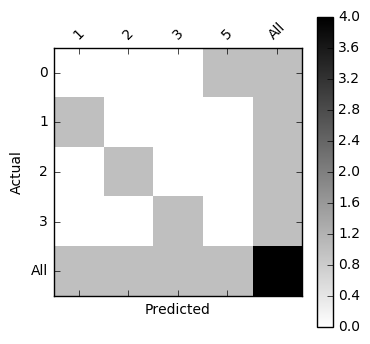

In [227]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)
plt.show()

In [261]:
df_confusion=pd.crosstab(t, p, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,2,3,4,5,All
Actual,,,,,
0,0,0,0,1,1
2,1,0,0,0,1
3,0,1,0,0,1
4,0,0,1,0,1
All,1,1,1,1,4


In [299]:
c=pd.read_csv(path+'ConfusionMatrix.txt')

In [300]:
c

,0.0,1.0,65.0,15.0,4.0,15.0.1,23.0,2.0,26.0,8.0,...,0.0.2,1.0.1,11.0.1,29.0,10.0.1,2.0.1,7.0,33.0,10.0.2,7.0.1
0,0.0,174.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,164.0,22.0,6.0,39.0,6.0,3.0,32.0,7.0,...,0.0,6.0,7.0,26.0,4.0,1.0,0.0,6.0,4.0,2.0
2,0.0,1.0,45.0,297.0,8.0,11.0,2.0,19.0,24.0,48.0,...,0.0,0.0,47.0,84.0,24.0,8.0,10.0,11.0,8.0,4.0
3,0.0,3.0,13.0,3.0,75.0,10.0,5.0,14.0,7.0,7.0,...,0.0,4.0,5.0,6.0,14.0,7.0,4.0,1.0,11.0,3.0
4,0.0,9.0,39.0,38.0,53.0,578.0,61.0,23.0,176.0,23.0,...,0.0,33.0,41.0,45.0,32.0,25.0,45.0,32.0,24.0,6.0
5,0.0,0.0,8.0,4.0,15.0,38.0,203.0,2.0,48.0,4.0,...,0.0,0.0,7.0,8.0,4.0,1.0,2.0,36.0,4.0,3.0
6,0.0,14.0,17.0,21.0,40.0,28.0,12.0,317.0,37.0,19.0,...,0.0,19.0,8.0,15.0,22.0,16.0,79.0,7.0,17.0,13.0
7,0.0,35.0,71.0,128.0,69.0,108.0,136.0,39.0,1168.0,13.0,...,0.0,2.0,71.0,41.0,31.0,10.0,38.0,48.0,51.0,4.0
8,0.0,0.0,11.0,3.0,23.0,34.0,18.0,8.0,50.0,212.0,...,0.0,3.0,16.0,16.0,16.0,7.0,31.0,5.0,3.0,1.0
9,0.0,1.0,9.0,7.0,6.0,6.0,5.0,0.0,14.0,5.0,...,0.0,0.0,6.0,23.0,2.0,1.0,0.0,11.0,0.0,0.0


In [311]:
c[1:3:]

,0.0,1.0,65.0,15.0,4.0,15.0.1,23.0,2.0,26.0,8.0,...,0.0.2,1.0.1,11.0.1,29.0,10.0.1,2.0.1,7.0,33.0,10.0.2,7.0.1
1,0.0,0.0,164.0,22.0,6.0,39.0,6.0,3.0,32.0,7.0,...,0.0,6.0,7.0,26.0,4.0,1.0,0.0,6.0,4.0,2.0
2,0.0,1.0,45.0,297.0,8.0,11.0,2.0,19.0,24.0,48.0,...,0.0,0.0,47.0,84.0,24.0,8.0,10.0,11.0,8.0,4.0


In [312]:
accuracy_score(c[1:28,],c[,1:29
                         ])

SyntaxError: invalid syntax (<ipython-input-312-c714839a07a1>, line 1)

In [228]:
accuracy = (t == p).sum() / float(len(t))
accuracy

0.75

In [229]:
cm = np.array([[2,1,0], [3,4,5], [6,7,8]])
cm

array([[2, 1, 0],
       [3, 4, 5],
       [6, 7, 8]])

In [230]:
true_pos = np.diag(cm)
true_pos

array([2, 4, 8])

In [231]:
false_pos = np.sum(cm, axis=0) - true_pos
false_pos

array([9, 8, 5])

In [232]:
false_neg = np.sum(cm, axis=1) - true_pos
false_neg

array([ 1,  8, 13])

In [233]:
precision = np.sum(true_pos / true_pos+false_pos)
recall = np.sum(true_pos / true_pos + false_neg)
print precision
recall

25


25

In [234]:
true_pos = np.diag(cm) 
precision = np.sum(true_pos / np.sum(cm, axis=0))
recall = np.sum(true_pos / np.sum(cm, axis=1))
print precision
recall

0


0

In [ ]:
df_confusion.

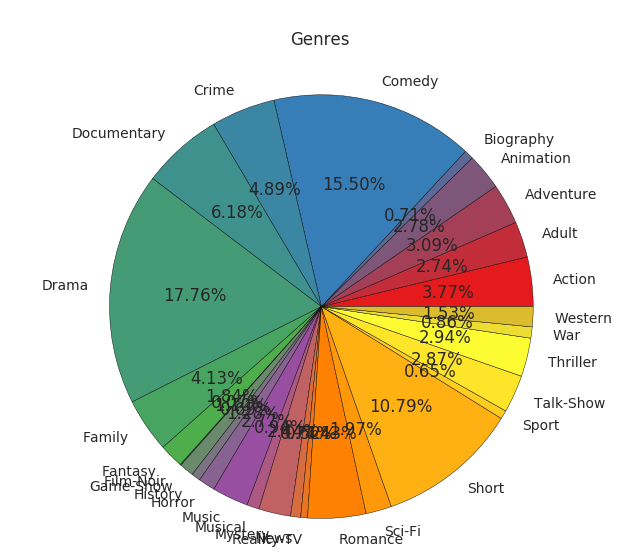

In [313]:
from pylab import *
labels = ['Action','Adult','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy',
'Film-Noir','Game-Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Short',
'Sport','Talk-Show','Thriller','War','Western']
fracs = [39398,28589,32333,29073,7424,162016,51141,64543,185578,43159,19254,705,11460,7165,13386,28903,9784,25475,8030
         ,5432,46283,20558,112768,6833,29994,30747,8968,15960]
from matplotlib import cm
a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)
pie(fracs,labels=labels,autopct='%1.2f%%',colors=cs)
plt.axis('equal')
title('\nGenres\n\n')
show()

In [268]:
len(labels)

28

In [272]:
sum(fracs)

1044959

In [274]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from collections import defaultdict
from collections import Counter
from datetime import datetime
import time
import matplotlib
import matplotlib.pyplot as plt
import pprint
import os
import reader
import re
import pprint
import seaborn as sns

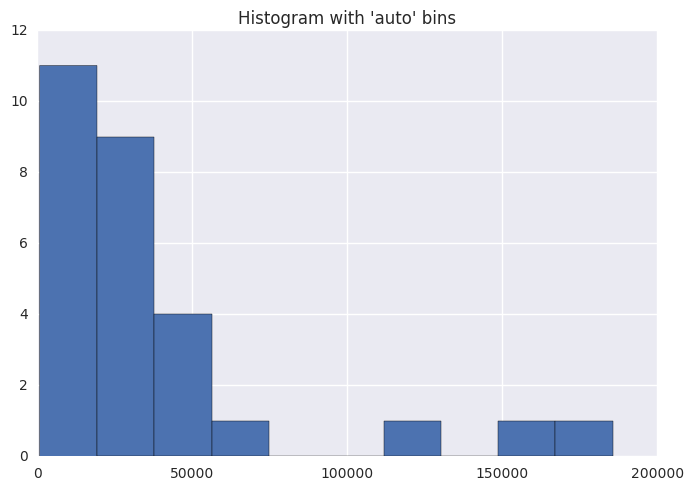

In [281]:
import matplotlib.pyplot as plt
>>> plt.hist(fracs)  # plt.hist passes it's arguments to np.histogram
>>> plt.title("Histogram with 'auto' bins")
>>> plt.show()

In [278]:
np.histogram(fracs)

(array([11,  9,  4,  1,  0,  0,  1,  0,  1,  1], dtype=int64),
 array([    705. ,   19192.3,   37679.6,   56166.9,   74654.2,   93141.5,
         111628.8,  130116.1,  148603.4,  167090.7,  185578. ]))